In [1]:
#import libraries
import pandas as pd

# Load your dataset
df= pd.read_csv('data/mental-heath-in-tech-2016_20161114.csv')
# Check the first few rows of the dataset
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [2]:
# Basic info (check for missing values and data types)
print(df.to_string(index=False))
# Get descriptive statistics for numerical columns
df.describe()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [4]:
# Check missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)

# Check total number of missing values
total_missing = missing_values.sum()

# Check number of duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
print("🔍 Missing Values Per Column:\n")
print(missing_values[missing_values > 0])

print(f"Total Missing Values in Dataset: {total_missing}")
print(f"Duplicate Rows: {duplicate_rows}")


🔍 Missing Values Per Column:

If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?                                                        1289
If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?                                                1229
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Do you know local or online resources to seek help for a mental health disorder?                                                                                                    1146
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?                                                               1146
Do you believe your productivity is ever affe


    mh = mental health
    ph = physical health
    neg = negative
    pos = pos
    diag = diagnosed
    prev = previous


In [5]:
#Rename columns
columns_new = [

    'self_employed',
    'company_size',
    'tech_comp_flag',
    'tech_role_flag',
    'mh_coverage_flag',
    'mh_coverage_awareness_flag',
    'mh_employer_discussion_flag',
    'mh_resources_provided_flag',
    'mh_anonymity_flag',
    'mh_sick_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_coworkers',
    'mh_discussion_supervisor',
    'mh_versus_ph_employer',
    'mh_consequence_coworkers',
    'mh_coverage_flag_2',
    'mh_online_resources_flag',
    'mh_diagnosed&reveal_clients_flag',
    'mh_diagnosed&reveal_clients_impact',
    'mh_diagnosed&reveal_coworkers_flag',
    'mh_coworkers_reveal_neg_impact',
    'mh_productivity_impact',
    'mh_productivity_impact_percentage',
    'prev_employers_flag',
    'prev_employers_mh_benefits',
    'prev_employers_mh_benefits_awareness',
    'prev_employers_mh_discussion',
    'prev_employers_mh_resources',
    'prev_employers_mh_anonymity',
    'prev_employers_mh_discuss_neg_consequences',
    'prev_employers_ph_discuss_neg_consequences',
    'prev_employers_mh_discussion_cowork',
    'prev_employers_mh_discussion_supervisor',
    'prev_employers_mh_importance_employer',
    'prev_employers_mh_consequences_coworkers',
    'future_employers_ph_specification',
    'why/why_not',
    'future_employers_mh_specification',
    'why/why_not_2',
    'mh_hurt_on_career',
    'mh_neg_view_coworkers',
    'mh_sharing_friends/fam_flag',
    'mh_bad_response_workplace',
    'mh_for_others_bad_response_workplace',
    'mh_family_history',
    'mh_disorder_past',
    'mh_disorder_current',
    'yes_what_diag',
    'maybe_whats_your_diag',
    'mh_diag_professional',
    'yes_condition_diag',
    'mh_sought_professional_treatment',
    'mh_effective_treat_impact_on_work',
    'mh_not_effective_treat_impact_on_work',
    'age',
    'gender',
    'country_live',
    'live_us_territory',
    'country_work',
    'work_us_territory',
    'work_position',
    'remote_flag'
]
df.columns = columns_new
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   company_size                                1146 non-null   object 
 2   tech_comp_flag                              1146 non-null   float64
 3   tech_role_flag                              263 non-null    float64
 4   mh_coverage_flag                            1146 non-null   object 
 5   mh_coverage_awareness_flag                  1013 non-null   object 
 6   mh_employer_discussion_flag                 1146 non-null   object 
 7   mh_resources_provided_flag                  1146 non-null   object 
 8   mh_anonymity_flag                           1146 non-null   object 
 9   mh_sick_leave                               1146 non-null   object 
 10  mh_discussio

In [6]:
# Check missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)

# Check total number of missing values
total_missing = missing_values.sum()

# Check number of duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
print("🔍 Missing Values Per Column:\n")
print(missing_values[missing_values > 0])

print(f"Total Missing Values in Dataset: {total_missing}")
print(f"Duplicate Rows: {duplicate_rows}")


🔍 Missing Values Per Column:

mh_diagnosed&reveal_clients_impact            1289
mh_productivity_impact_percentage             1229
tech_role_flag                                1170
mh_online_resources_flag                      1146
mh_coverage_flag_2                            1146
mh_productivity_impact                        1146
mh_coworkers_reveal_neg_impact                1146
mh_diagnosed&reveal_coworkers_flag            1146
mh_diagnosed&reveal_clients_flag              1146
maybe_whats_your_diag                         1111
yes_what_diag                                  865
mh_for_others_bad_response_workplace           776
yes_condition_diag                             722
live_us_territory                              593
work_us_territory                              582
mh_coverage_awareness_flag                     420
why/why_not                                    338
why/why_not_2                                  307
company_size                                   287
m

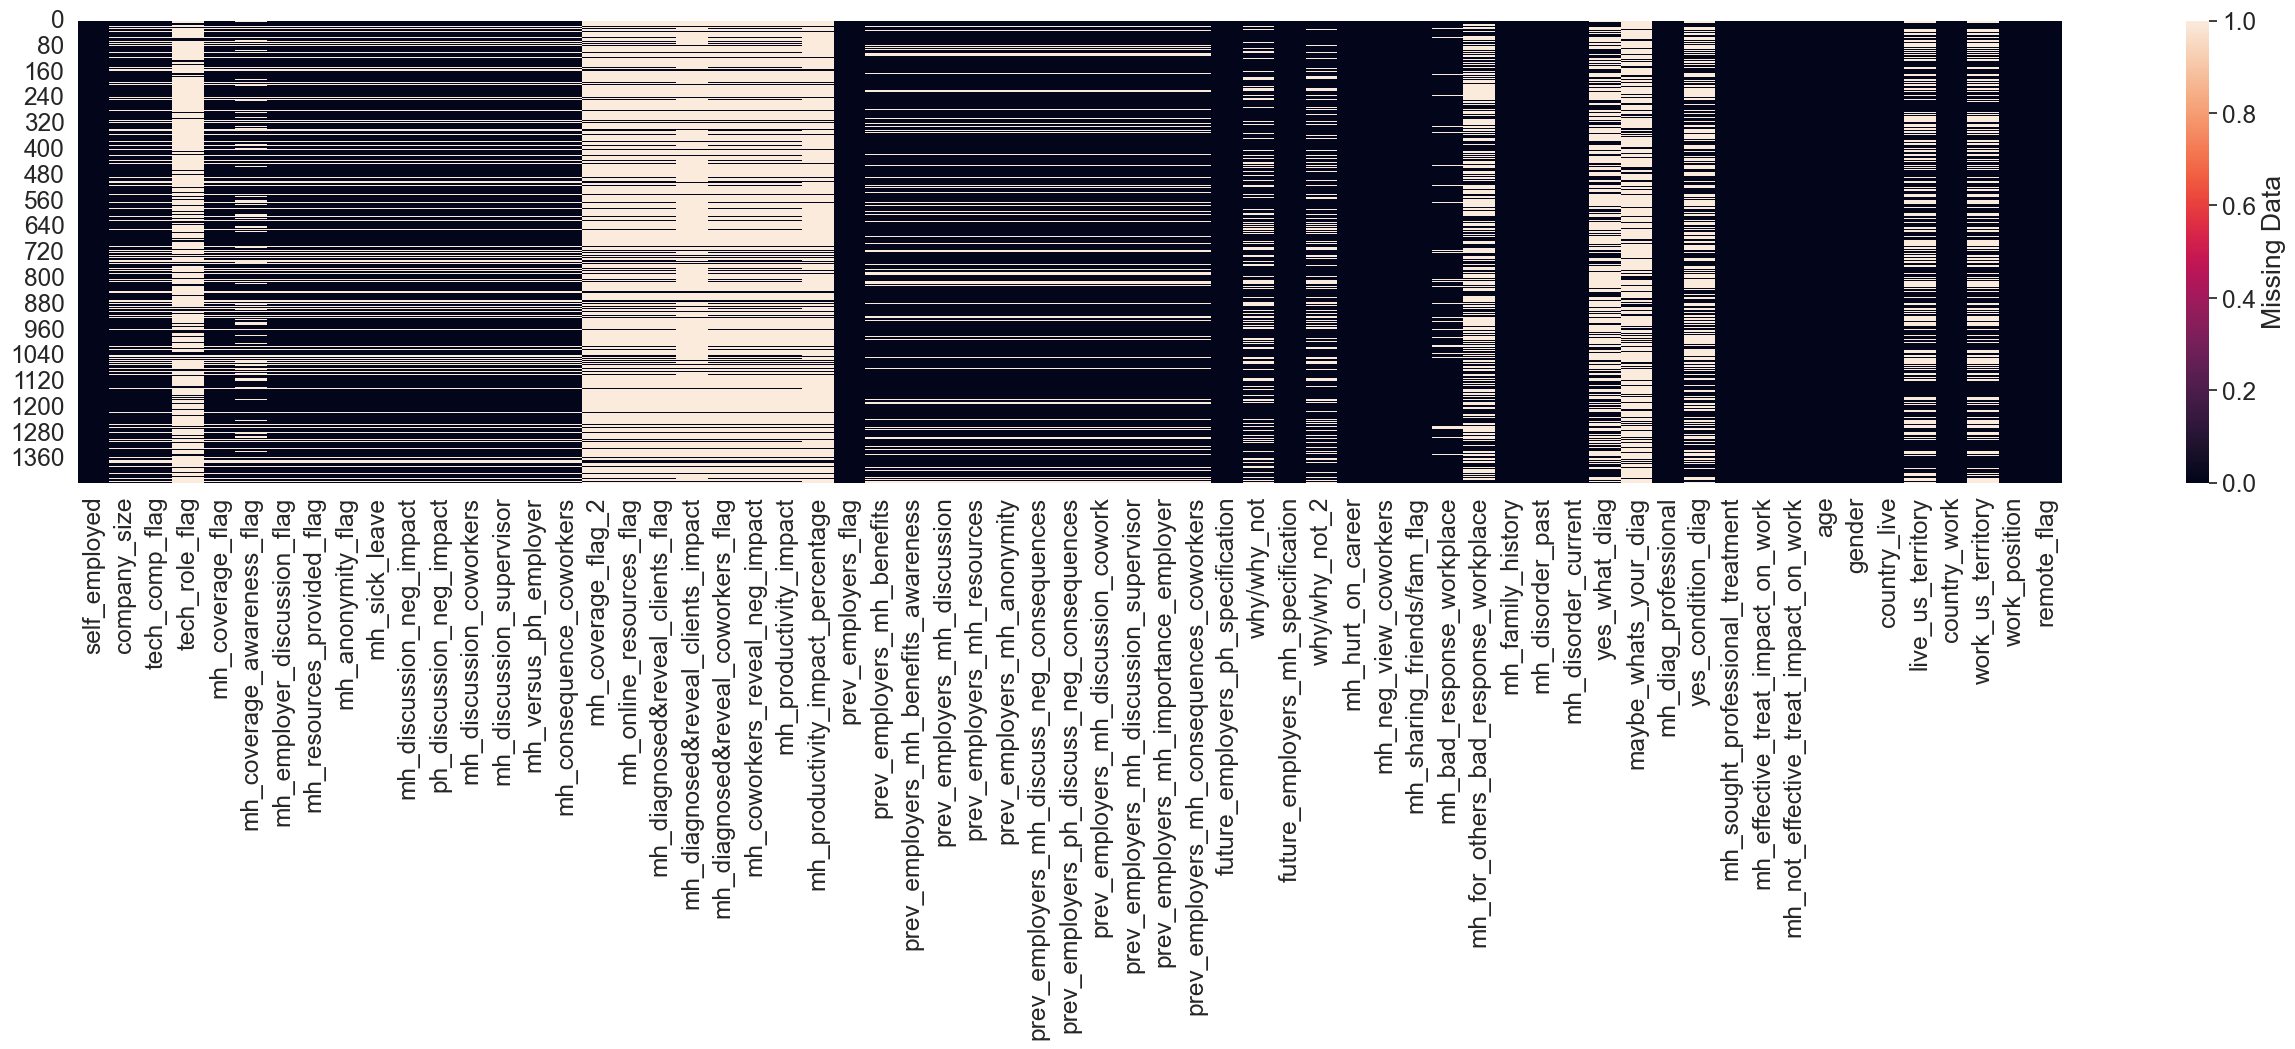

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set larger font scale for readability
sns.set(font_scale=1.6)

# Set the figure size
plt.figure(figsize=(32, 6))

# Create a heatmap of missing values with a different color map ('coolwarm')
sns.heatmap(df.isna(),
            cmap='rocket',
            cbar_kws={'label': 'Missing Data'})

# Show the plot
plt.show()


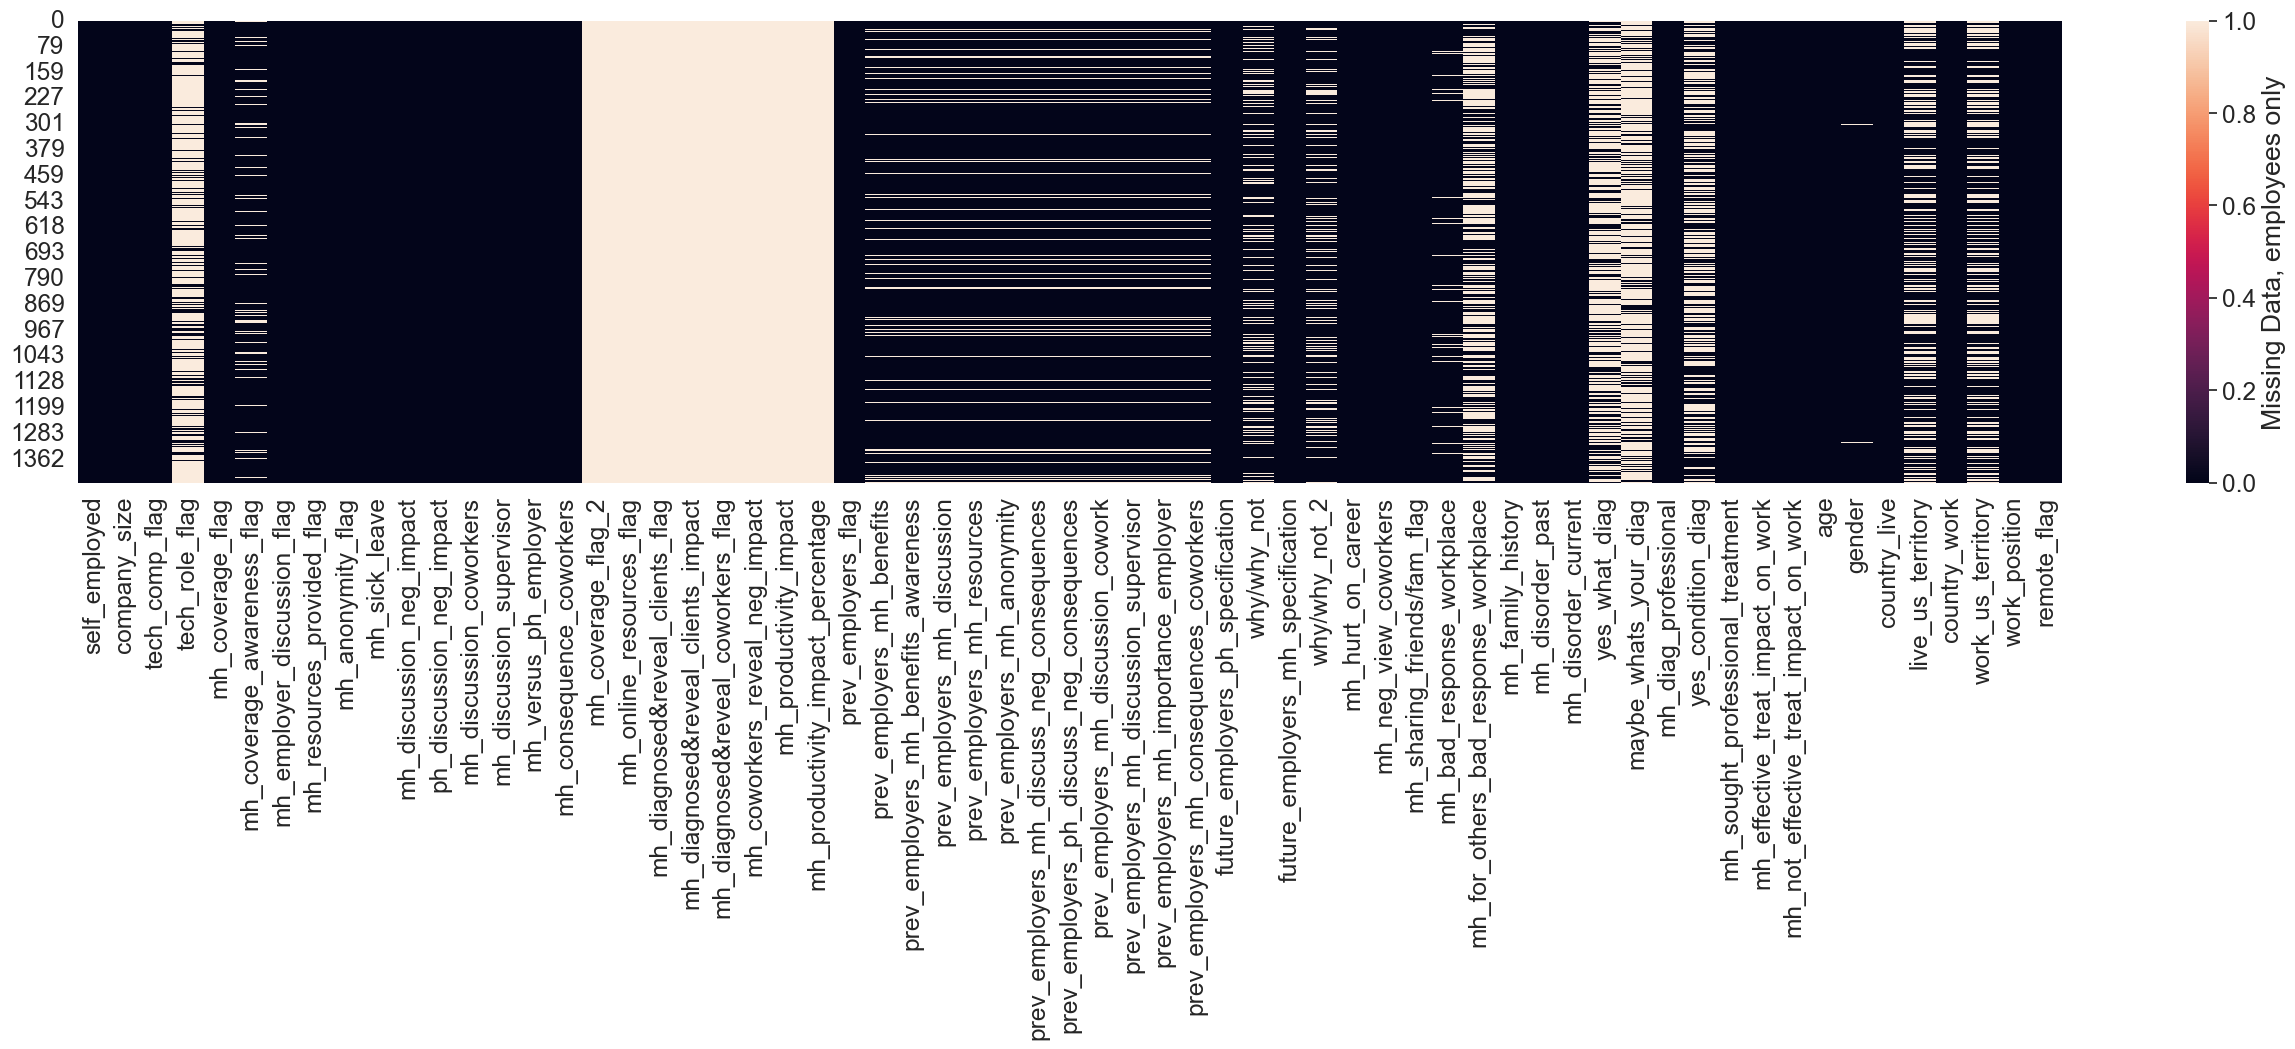

In [8]:
# Count all employees survey takers(survey takers who are employed answered with 0 in the survey)
mask_employed = df.self_employed == 0

plt.figure(figsize=(32,6))
sns.heatmap(df[mask_employed].isna(),
            cmap='rocket',
            cbar_kws={'label': 'Missing Data, employees only'})
plt.show()
# plt.savefig("Missing_values_employed.png", dpi=300, format="png")


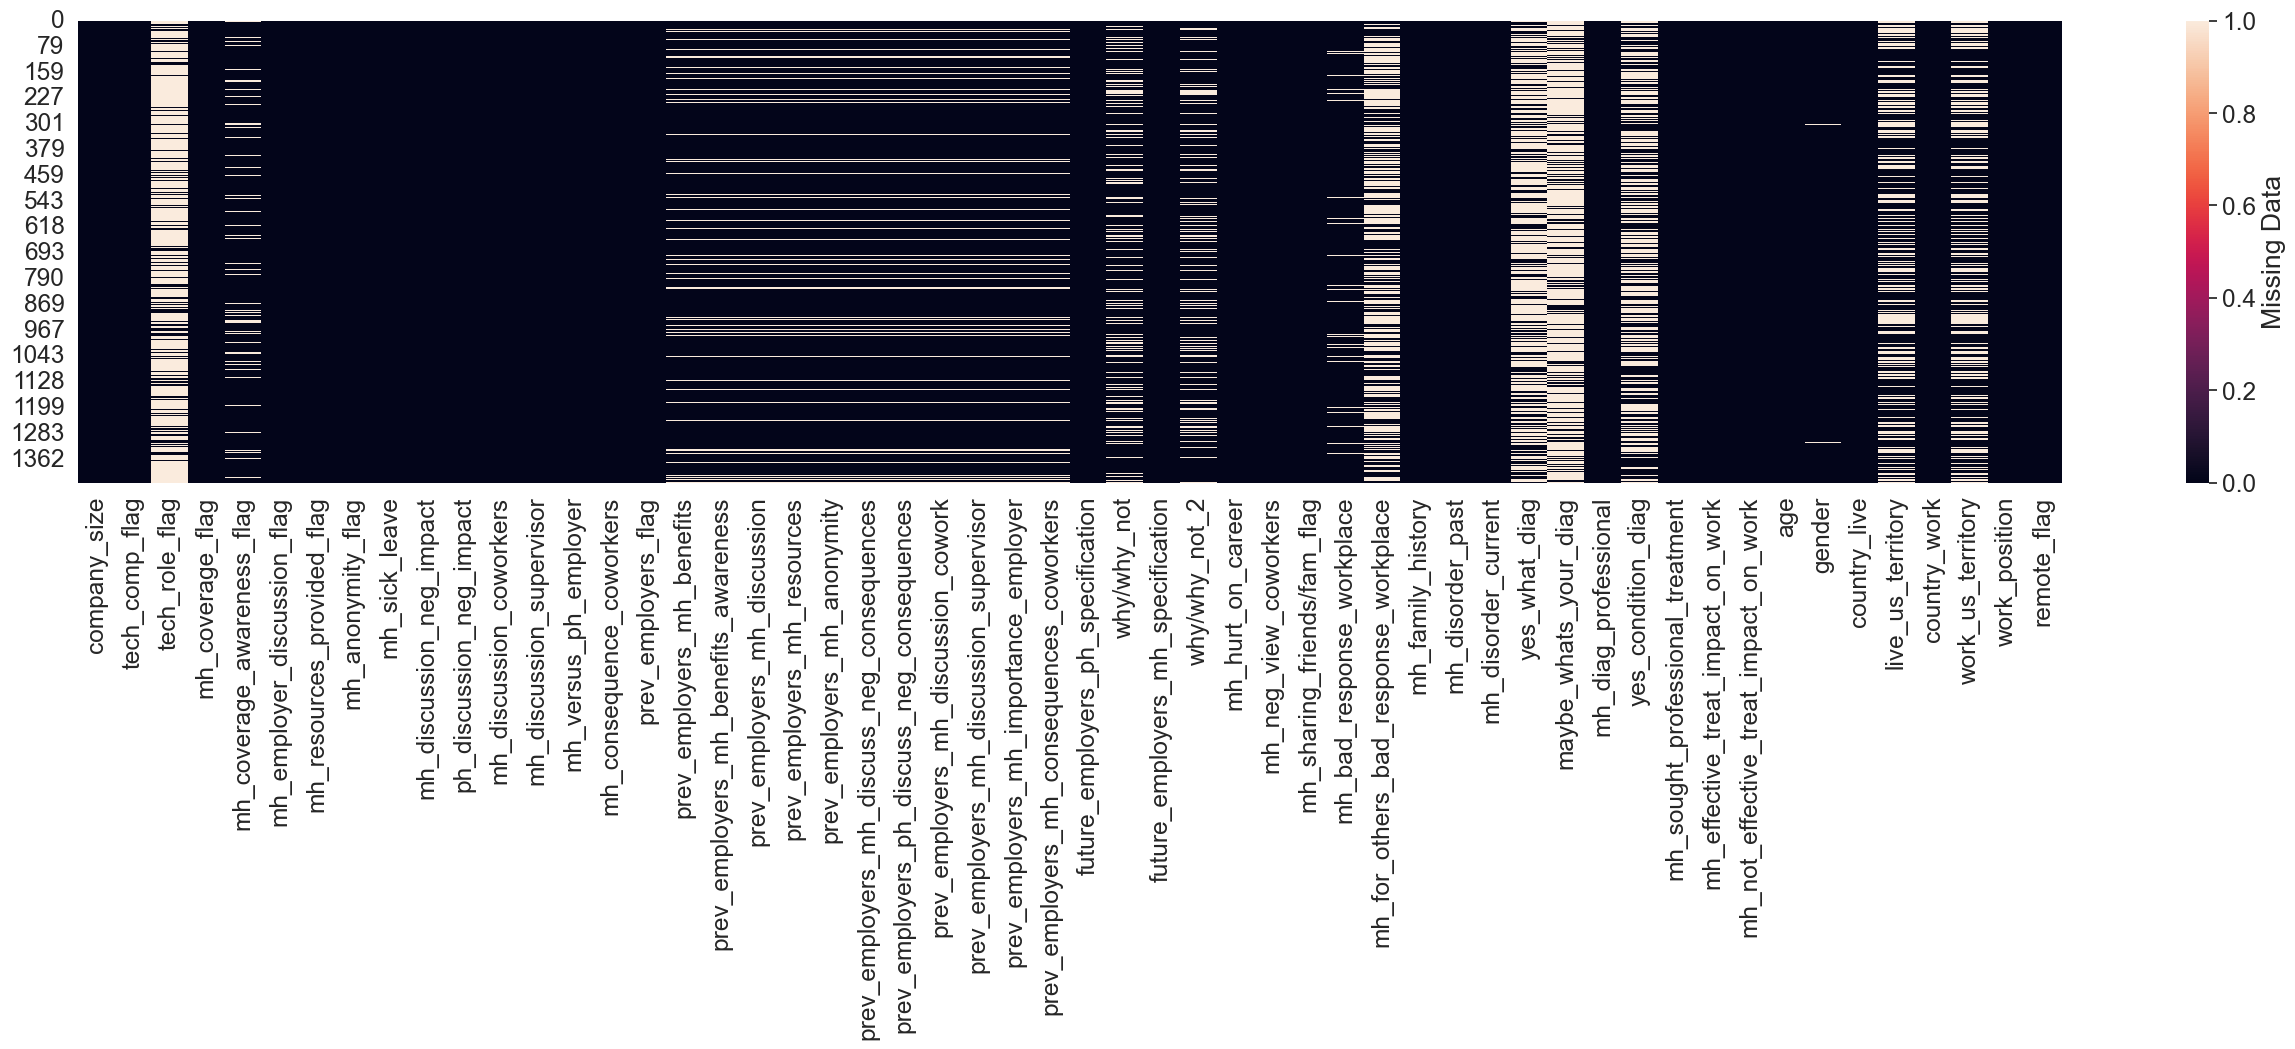

In [9]:
# Drop all rows having self-employed survey takers
df.drop(df[df.self_employed == 1].index, inplace=True)

# Drop the column `self_employed`
df.drop('self_employed',axis=1,inplace=True)

# Drop all columns referencing answer by only self-employed survey takers
df.drop(df.loc[:,'mh_coverage_flag_2':'mh_productivity_impact_percentage'],axis=1,inplace=True)


# Create the heatmap for missing data visualization
sns.set(font_scale=1.6)
plt.figure(figsize=(32, 6))
sns.heatmap(df.isna(),
            cmap='rocket',
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [10]:
df.shape

(1146, 54)

In [11]:
# Check for missing values in each column
missing_data = df.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_data / len(df)) * 100

# Filter columns where more than 50% of the data is missing
columns_with_missing_50 = missing_percentage[missing_percentage > 50].index

# Display columns with more than 50% missing data
print("Columns with more than 50% missing data:")
print(columns_with_missing_50)
# Filter the DataFrame to only show these columns
df_with_missing_50 = df[columns_with_missing_50]


Columns with more than 50% missing data:
Index(['tech_role_flag', 'mh_for_others_bad_response_workplace',
       'yes_what_diag', 'maybe_whats_your_diag', 'yes_condition_diag'],
      dtype='object')


In [12]:

df.drop(['why/why_not','why/why_not_2','mh_sought_professional_treatment',
         'yes_what_diag','maybe_whats_your_diag','live_us_territory','work_us_territory', 'mh_for_others_bad_response_workplace',
         'yes_condition_diag'], axis=1,inplace=True)

In [13]:
# analyze the distribution of values in the work_position column DataFrame and retrieve the top 15 most frequent entries.
df.groupby('work_position').size().sort_values(ascending=False).head(20)

work_position
Back-end Developer                                                             238
Front-end Developer                                                            116
Other                                                                           99
Supervisor/Team Lead                                                            60
Back-end Developer|Front-end Developer                                          58
DevOps/SysAdmin                                                                 48
Front-end Developer|Back-end Developer                                          33
Support                                                                         32
Executive Leadership                                                            30
Dev Evangelist/Advocate                                                         27
Designer                                                                        18
Supervisor/Team Lead|Back-end Developer                                  

In [66]:
# Create a mask for all work positions that contain a tech-related role
mask_tech_role_flag = df['work_position'].str.contains('Back-end|Front-end|DevOps|SysAdmin|Developer', na=False)

# Initialize the 'tech_role_flag' column as 'No' for all rows
df['tech_role_flag'] = 'No'

# Fill 'tech_role_flag' with 'Yes' where the mask is True
df.loc[mask_tech_role_flag, 'tech_role_flag'] = 'Yes'

# Show the distribution of tech roles
print(df['tech_role_flag'].value_counts())

tech_role_flag
Yes    830
No     316
Name: count, dtype: int64


In [15]:
# Create list of columns with missing values
col_w_nan = df.columns[df.isna().any()].tolist()

# Safely impute with mode only if mode exists
for col in col_w_nan:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])
    else:
        print(f"Warning: Column '{col}' has no mode (likely all NaN). Skipped.")

<Figure size 1600x1600 with 0 Axes>

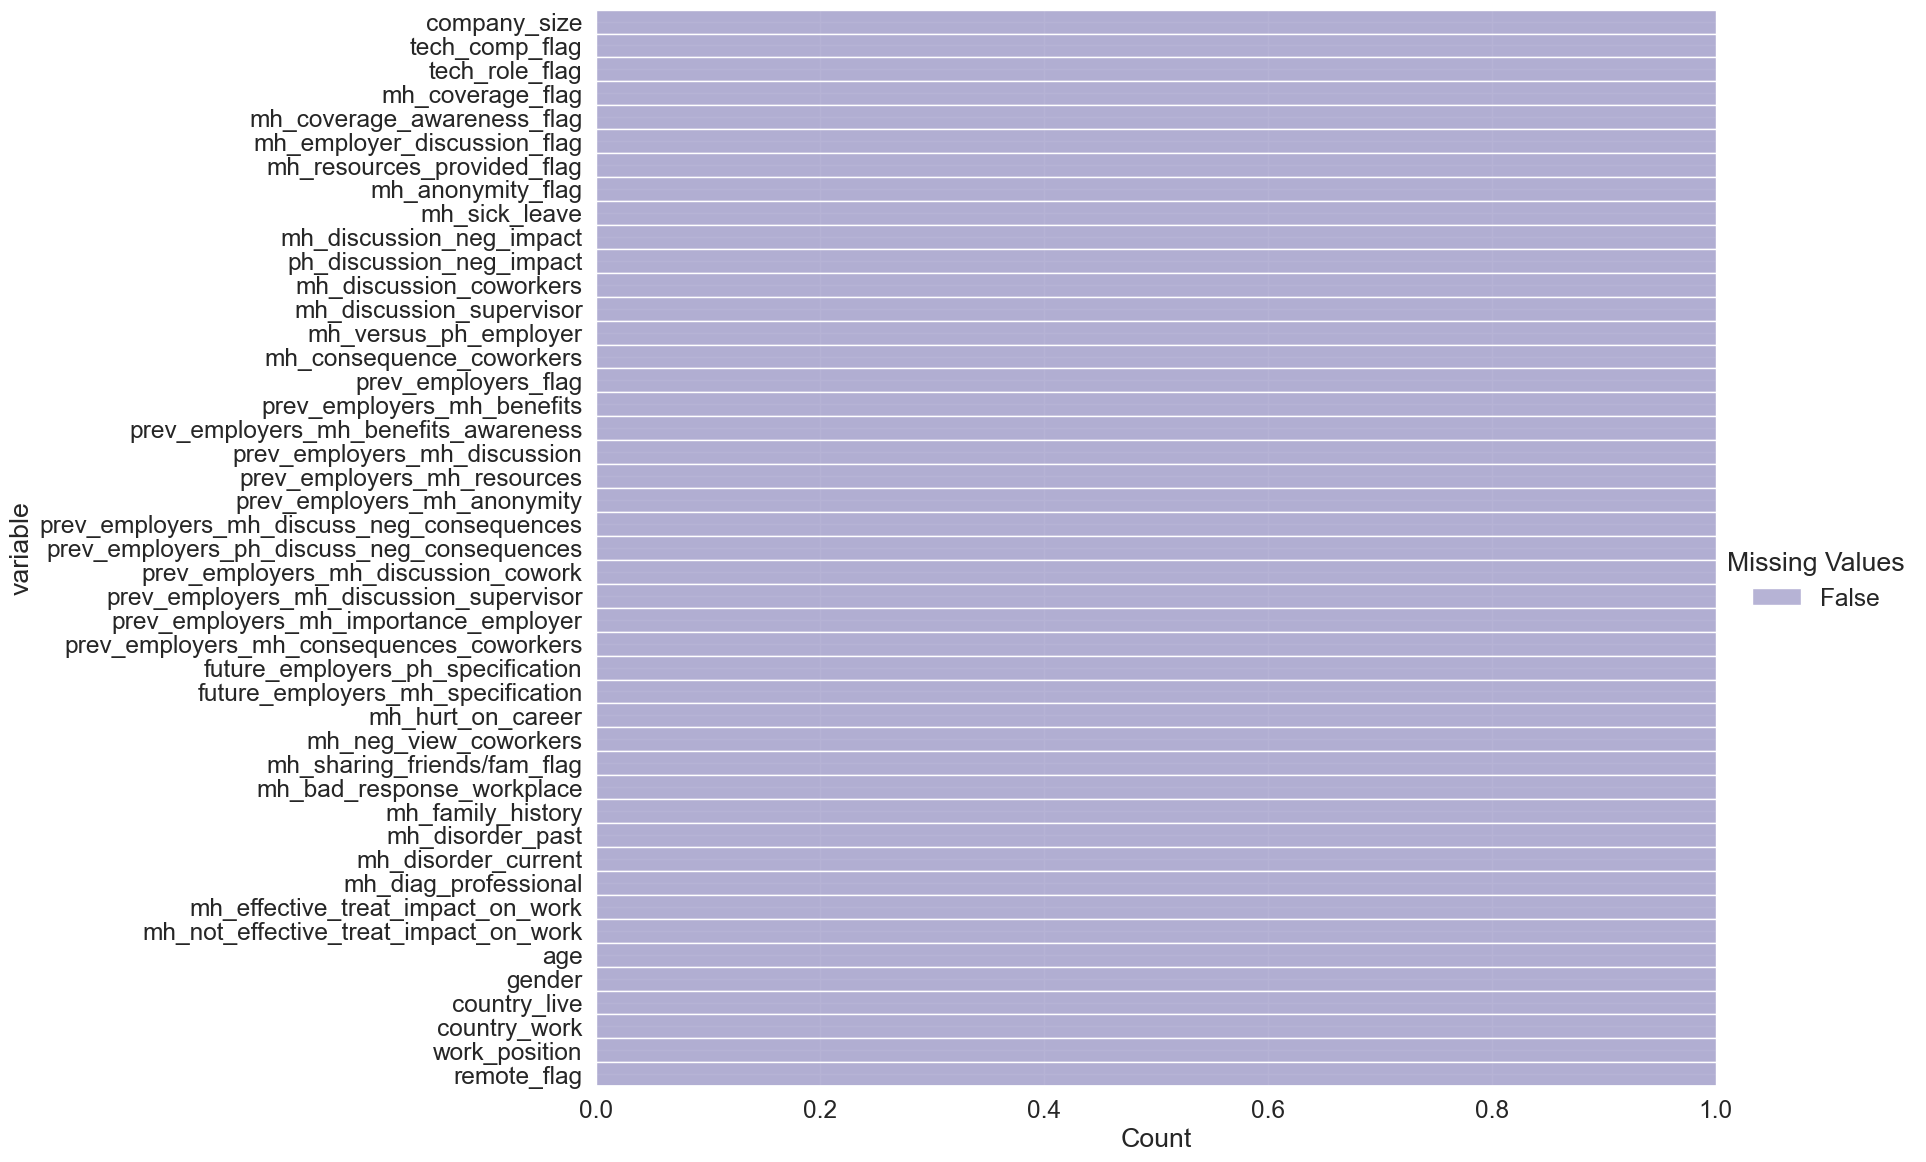

In [16]:
plt.figure(figsize=(16,16))
ax1 = sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.5,
        height=12,
        palette="Purples",
)

ax1._legend.set_title("Missing Values")
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/2296635986.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=keys, palette="flare")


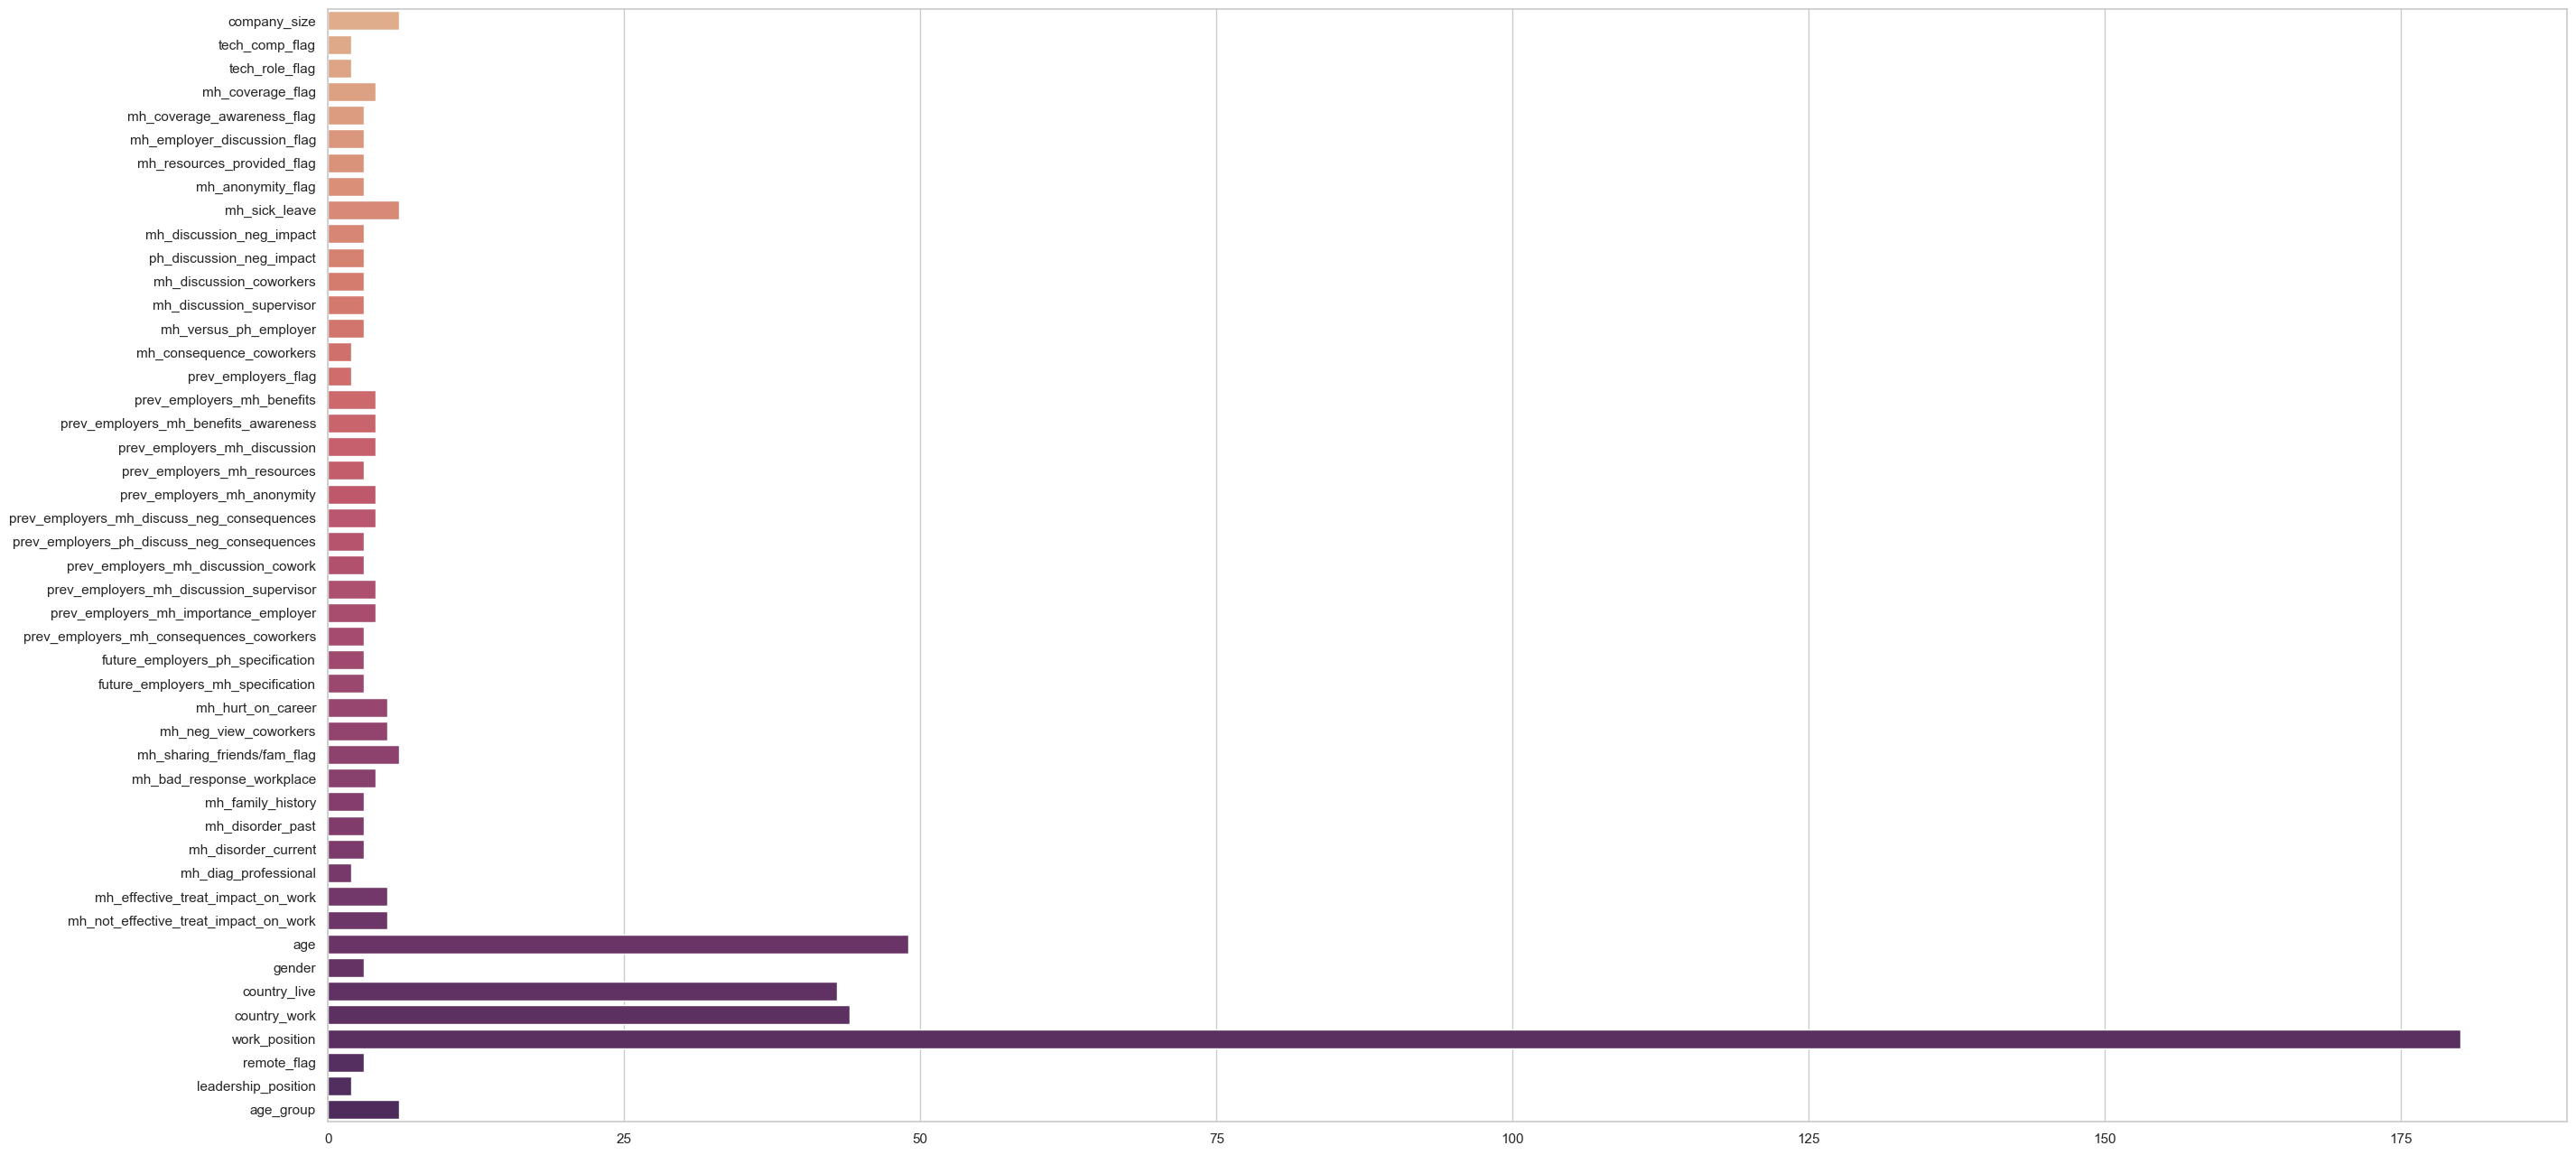

In [69]:
# Step 1: Create a dictionary to hold the number of unique values per column
number_of_answers_dict = {}

# Loop through each column in the DataFrame
for n in df.columns:
    # Count unique values in the column and store it in the dictionary
    number_of_answers_dict[n] = len(df[n].value_counts())

# Step 2: Plot the number of unique answers per column as a bar chart

# Set the figure size for better visibility
plt.figure(figsize=(32,16))

# Set the Seaborn style to whitegrid for a clean background
sns.set_style("whitegrid")

# Extract column names (keys) and number of unique values (values) from the dictionary
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())

# Create a horizontal bar plot (columns on the y-axis, number of unique values on the x-axis)
sns.barplot(x=vals, y=keys, palette="flare")

# Display the plot
plt.show()

In [18]:
len(df.gender.value_counts())
df[['gender']].head(20)

,gender
0,Male
1,male
2,Male
4,Female
5,Male
6,M
7,female
8,Female
10,Male
11,Male


In [71]:
# Create lists for 3 categories "male", "female", "other"
Male = ['Male', 'male', 'Male ', 'M', 'm','man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)',
        'Man', 'Sex is male','cis male', 'Malr', 'Dude',
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']

Female = ['Female', 'female', 'I identify as female.', 'female ','Female assigned at birth ', 'F', 'Woman',
          'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
          'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem',
          'Female (props for making this a freeform field, though)',' Female', 'Cis-woman',
          'female-bodied; no feelings about gender','AFAB']

other = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf',
         'Queer', 'Agender', 'Fluid','Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl',
         'Transgender woman','Yes','No']

# Replace all sex in columns with one of the 3 sex categories
df['gender'] = df['gender'].replace(to_replace=male, value='Male')
df['gender'] = df['gender'].replace(to_replace=female, value='Female')
df['gender'] = df['gender'].replace(to_replace=other, value='other')

# Verify the results
print(df['gender'].value_counts())

gender
Male      852
Female    272
other      22
Name: count, dtype: int64


In [89]:
# Strip whitespace and normalize the case to ensure consistent matching
df['gender'] = df['gender'].str.strip().str.lower()

# Remove rows where 'gender' is 'other'
df = df[df['gender'] != 'other']

# Restore the original case for 'Male' and 'Female'
df['gender'] = df['gender'].replace({'male': 'Male', 'female': 'Female'})

# Verify the results
print(df['gender'].value_counts())

gender
Male      852
Female    272
Name: count, dtype: int64


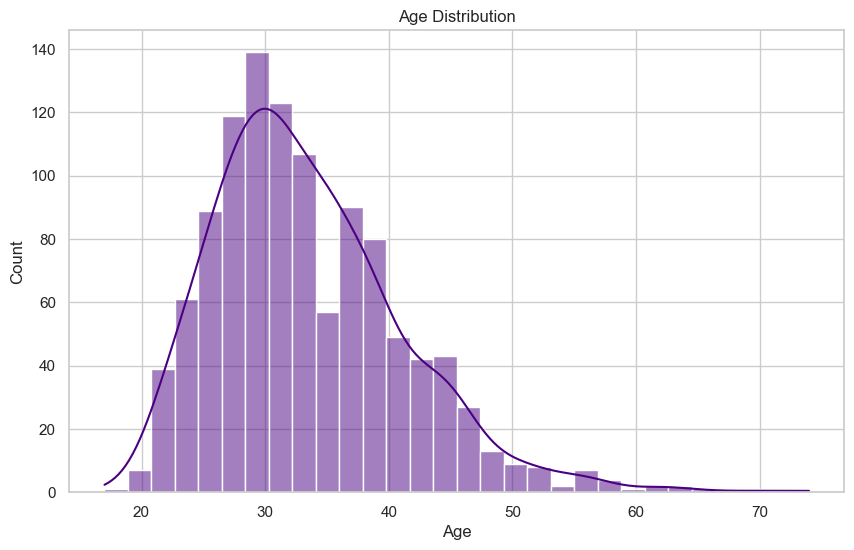

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='#4B0082')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


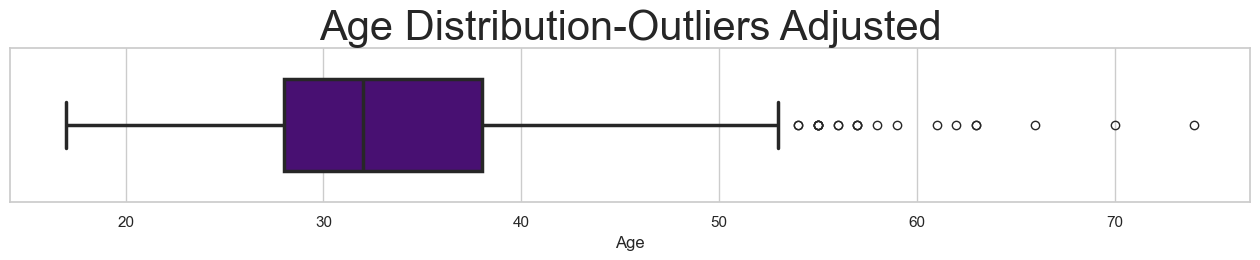

In [91]:
# Calculate the median age
median_age = df['age'].median()

# Replace values larger than 120 or smaller than 14 with the median age using np.where
import numpy as np
df['age'] = np.where((df['age'] >= 120) | (df['age'] <= 14), median_age, df['age'])

# Create the boxplot for the cleaned age data
plt.figure(figsize=(16, 2))
sns.set(style="whitegrid")

# Using dark purple color
sns.boxplot(
    x=df['age'],  # x-axis for horizontal boxplot
    color='#4B0082',  # dark purple
    linewidth=2.5,
    width=0.6
)

# Adding title and labels
plt.title('Age Distribution-Outliers Adjusted', fontsize=30)
plt.xlabel('Age')

# Show the plot
plt.show()


In [92]:
# Inspecting the first few rows to check the column values
df.head(3)

# Define columns that need to be cleaned and standardized
yes_no_columns = ['tech_comp_flag', 'prev_employers_flag']  # Add your columns here

# Define a dictionary for all the possible mappings
replacement_dict = {
    0: "No",
    1: "Yes",
    'Not eligible for coverage / N/A': "No",
    'N/A': "No",
    'na': "No",  # Case insensitivity for "na"
    'Not applicable': "No",  # Add other variations of 'not applicable'
    'no': "No",  # To handle lowercase variations
    'yes': "Yes"  # To handle lowercase variations
}

# Loop over the columns to replace values
for col in yes_no_columns:
    df[col] = df[col].replace(replacement_dict)

# Verify the changes
df.head(3)


,company_size,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion_flag,mh_resources_provided_flag,mh_anonymity_flag,mh_sick_leave,mh_discussion_neg_impact,...,mh_effective_treat_impact_on_work,mh_not_effective_treat_impact_on_work,age,gender,country_live,country_work,work_position,remote_flag,leadership_position,age_group
0,26-100,Yes,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39.0,Male,UK,UK,Back-end Developer,Sometimes,No,36–45
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29.0,Male,US,US,Back-end Developer|Front-end Developer,Never,No,26–35
2,6-25,Yes,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38.0,Male,UK,UK,Back-end Developer,Always,No,36–45


In [93]:
print(df['country_work'].value_counts())

country_work
US                        705
UK                        128
CA                         60
DE                         42
NL                         30
AU                         26
Sweden                     15
France                     11
Russia                      9
Brazil                      9
Ireland                     9
India                       7
New Zealand                 6
Bulgaria                    6
Switzerland                 5
Denmark                     5
Finland                     5
South Africa                4
Chile                       3
Norway                      3
Italy                       3
Belgium                     3
Bosnia and Herzegovina      2
Israel                      2
Poland                      2
Pakistan                    2
Estonia                     2
Mexico                      2
Spain                       2
Colombia                    2
Slovakia                    1
Romania                     1
Austria                    

In [94]:
print(df['country_live'].value_counts())

country_live
US                        698
UK                        129
CA                         62
DE                         42
NL                         30
AU                         26
Sweden                     14
France                     11
Russia                      9
Ireland                     9
Brazil                      9
India                       7
Bulgaria                    6
New Zealand                 6
Italy                       5
Switzerland                 5
Finland                     5
Denmark                     5
South Africa                4
Chile                       3
Norway                      3
Spain                       3
Belgium                     3
Pakistan                    3
Israel                      2
Bosnia and Herzegovina      2
Poland                      2
Romania                     2
Afghanistan                 2
Estonia                     2
Colombia                    2
Mexico                      2
Bangladesh                 

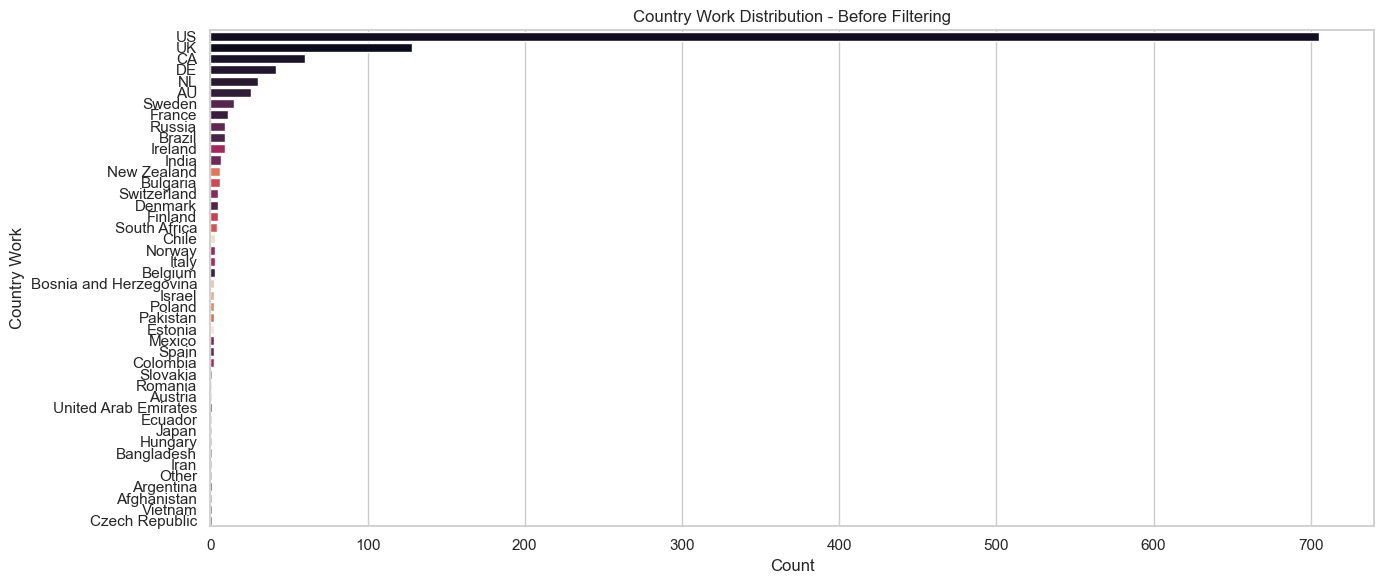

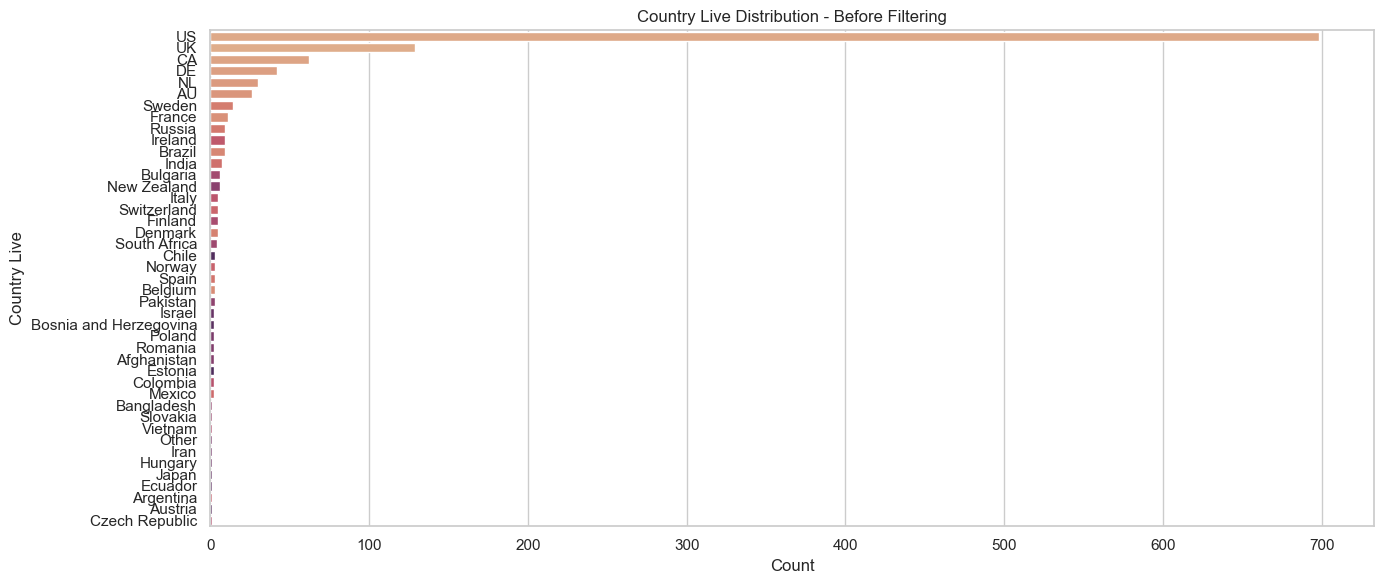

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Before filtering ---

# Country Work - Before Filtering
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='country_work', hue='country_work',
              order=df['country_work'].value_counts().index,
              palette='rocket', legend=False)
plt.title("Country Work Distribution - Before Filtering")
plt.xlabel("Count")
plt.ylabel("Country Work")
plt.tight_layout()
plt.show()

# Country Live - Before Filtering
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='country_live', hue='country_live',
              order=df['country_live'].value_counts().index,
              palette='flare', legend=False)
plt.title("Country Live Distribution - Before Filtering")
plt.xlabel("Count")
plt.ylabel("Country Live")
plt.tight_layout()
plt.show()


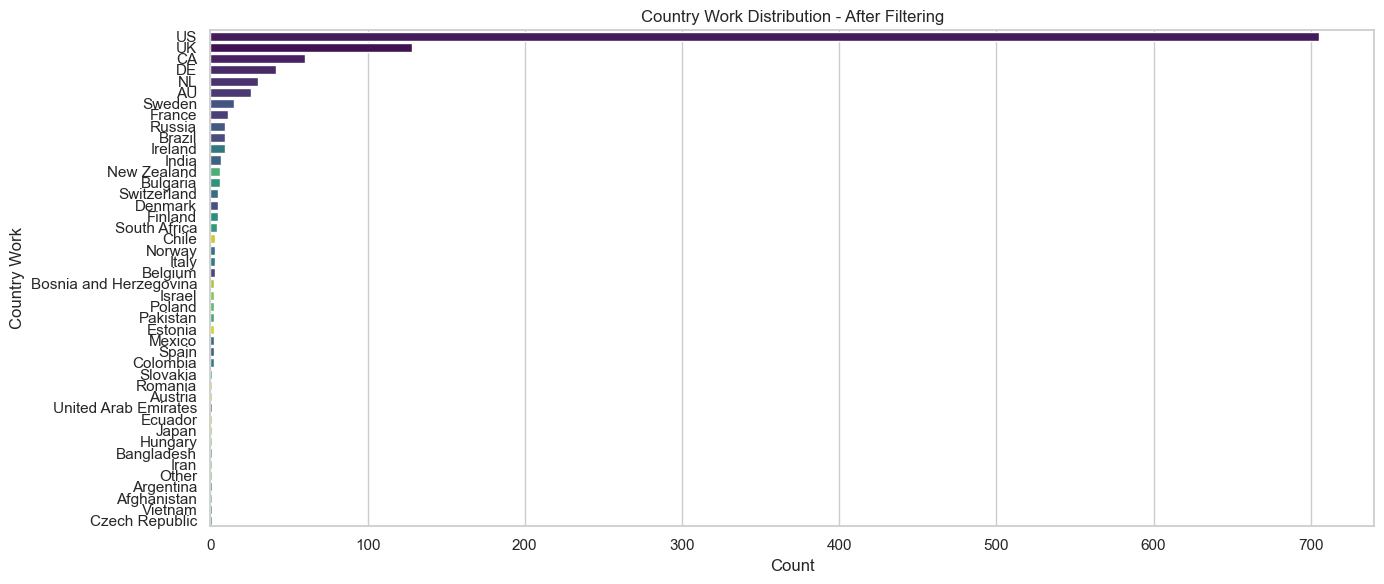

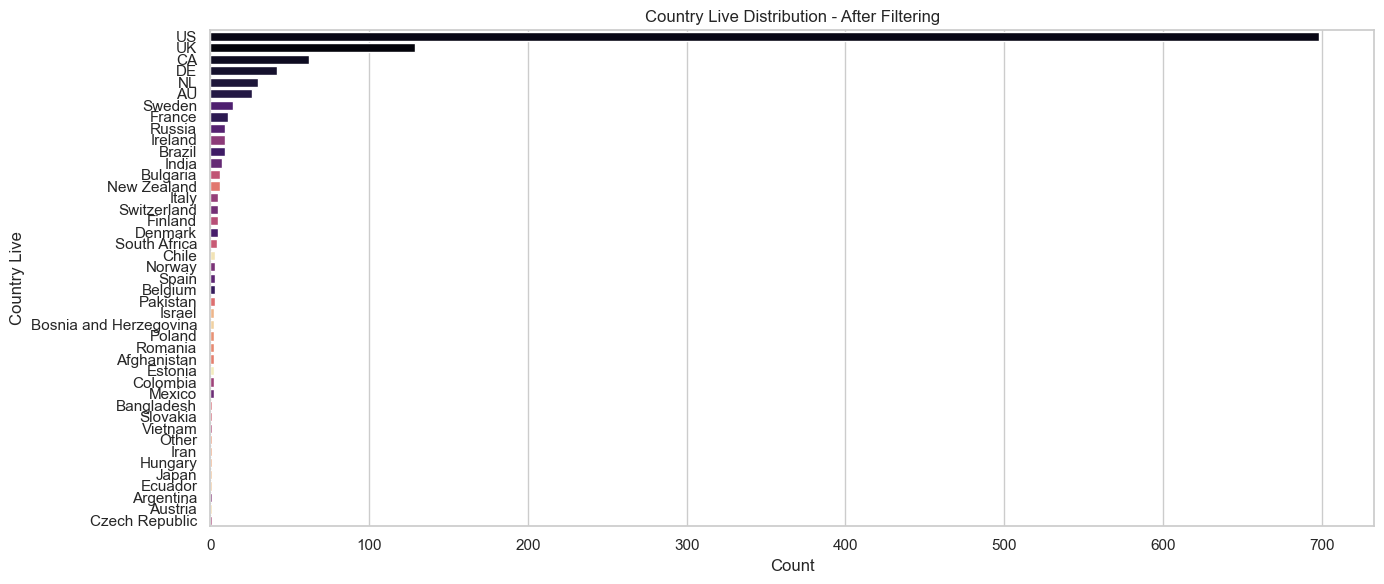

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Country Work (after filtering)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='country_work', hue='country_work',
              order=df['country_work'].value_counts().index,
              palette='viridis', legend=False)
plt.title("Country Work Distribution - After Filtering")
plt.xlabel("Count")
plt.ylabel("Country Work")
plt.tight_layout()
plt.show()

# Country Live (after filtering)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='country_live', hue='country_live',
              order=df['country_live'].value_counts().index,
              palette='magma', legend=False)
plt.title("Country Live Distribution - After Filtering")
plt.xlabel("Count")
plt.ylabel("Country Live")
plt.tight_layout()
plt.show()


In [97]:
country_rename_map = {
    "United States of America": "US",
    "United Kingdom": "UK",
    "Germany": "DE",
    "Canada": "CA",
    "Netherlands": "NL",
    "Australia": "AU"
}
df['country_work'] = df['country_work'].replace(country_rename_map)
df['country_live'] = df['country_live'].replace(country_rename_map)

In [98]:
print(df['country_work'].value_counts())
print(df['country_live'].value_counts())

country_work
US                        705
UK                        128
CA                         60
DE                         42
NL                         30
AU                         26
Sweden                     15
France                     11
Russia                      9
Brazil                      9
Ireland                     9
India                       7
New Zealand                 6
Bulgaria                    6
Switzerland                 5
Denmark                     5
Finland                     5
South Africa                4
Chile                       3
Norway                      3
Italy                       3
Belgium                     3
Bosnia and Herzegovina      2
Israel                      2
Poland                      2
Pakistan                    2
Estonia                     2
Mexico                      2
Spain                       2
Colombia                    2
Slovakia                    1
Romania                     1
Austria                    

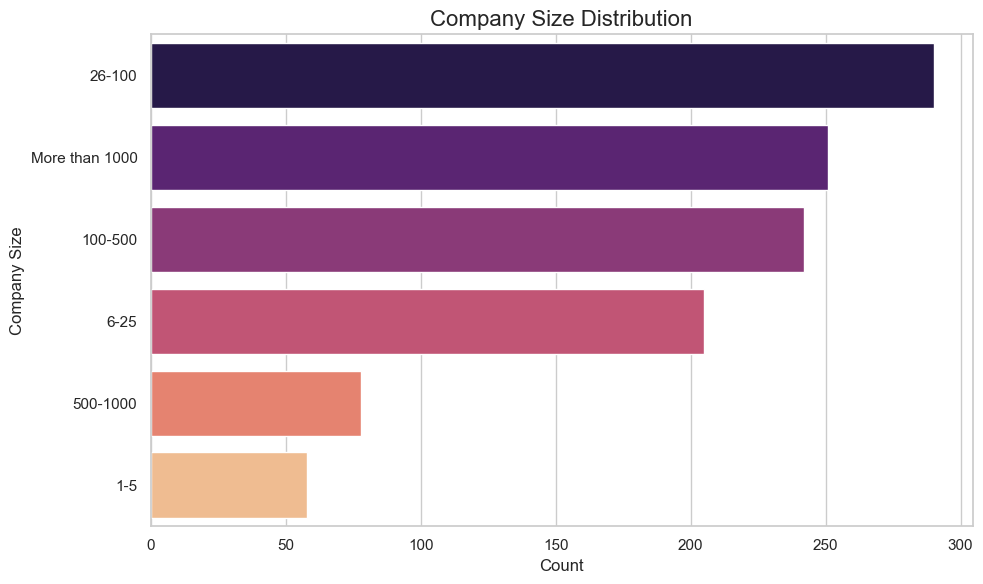

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a DataFrame from value_counts for plotting
company_counts = df['company_size'].value_counts().reset_index()
company_counts.columns = ['company_size', 'count']

# Updated plot with `hue` and `legend=False`
sns.barplot(
    data=company_counts,
    x='count',
    y='company_size',
    hue='company_size',
    palette='magma',
    dodge=False,
    legend=False
)

plt.title('Company Size Distribution', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Company Size')
plt.tight_layout()
plt.show()

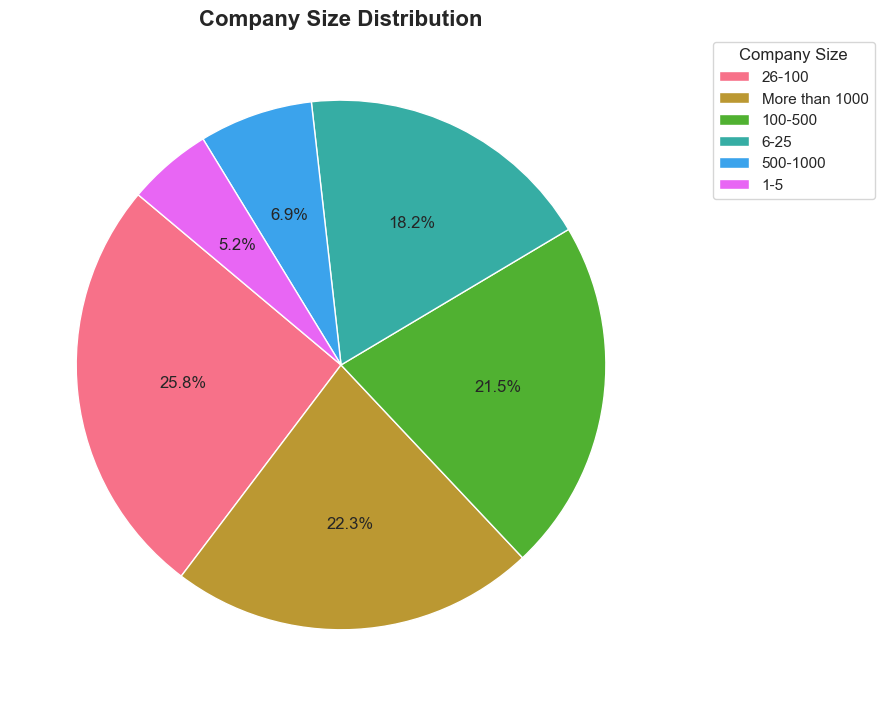

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and sort values
company_size_counts = df['company_size'].value_counts().dropna()

# Optional: remove vague entries
company_size_counts = company_size_counts[~company_size_counts.index.str.contains('Not sure', case=False)]

# Plot
plt.figure(figsize=(9, 9))
company_size_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("husl", len(company_size_counts)),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    labeldistance=None  # Hide labels on the chart
)
plt.title('Company Size Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.legend(company_size_counts.index, title="Company Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

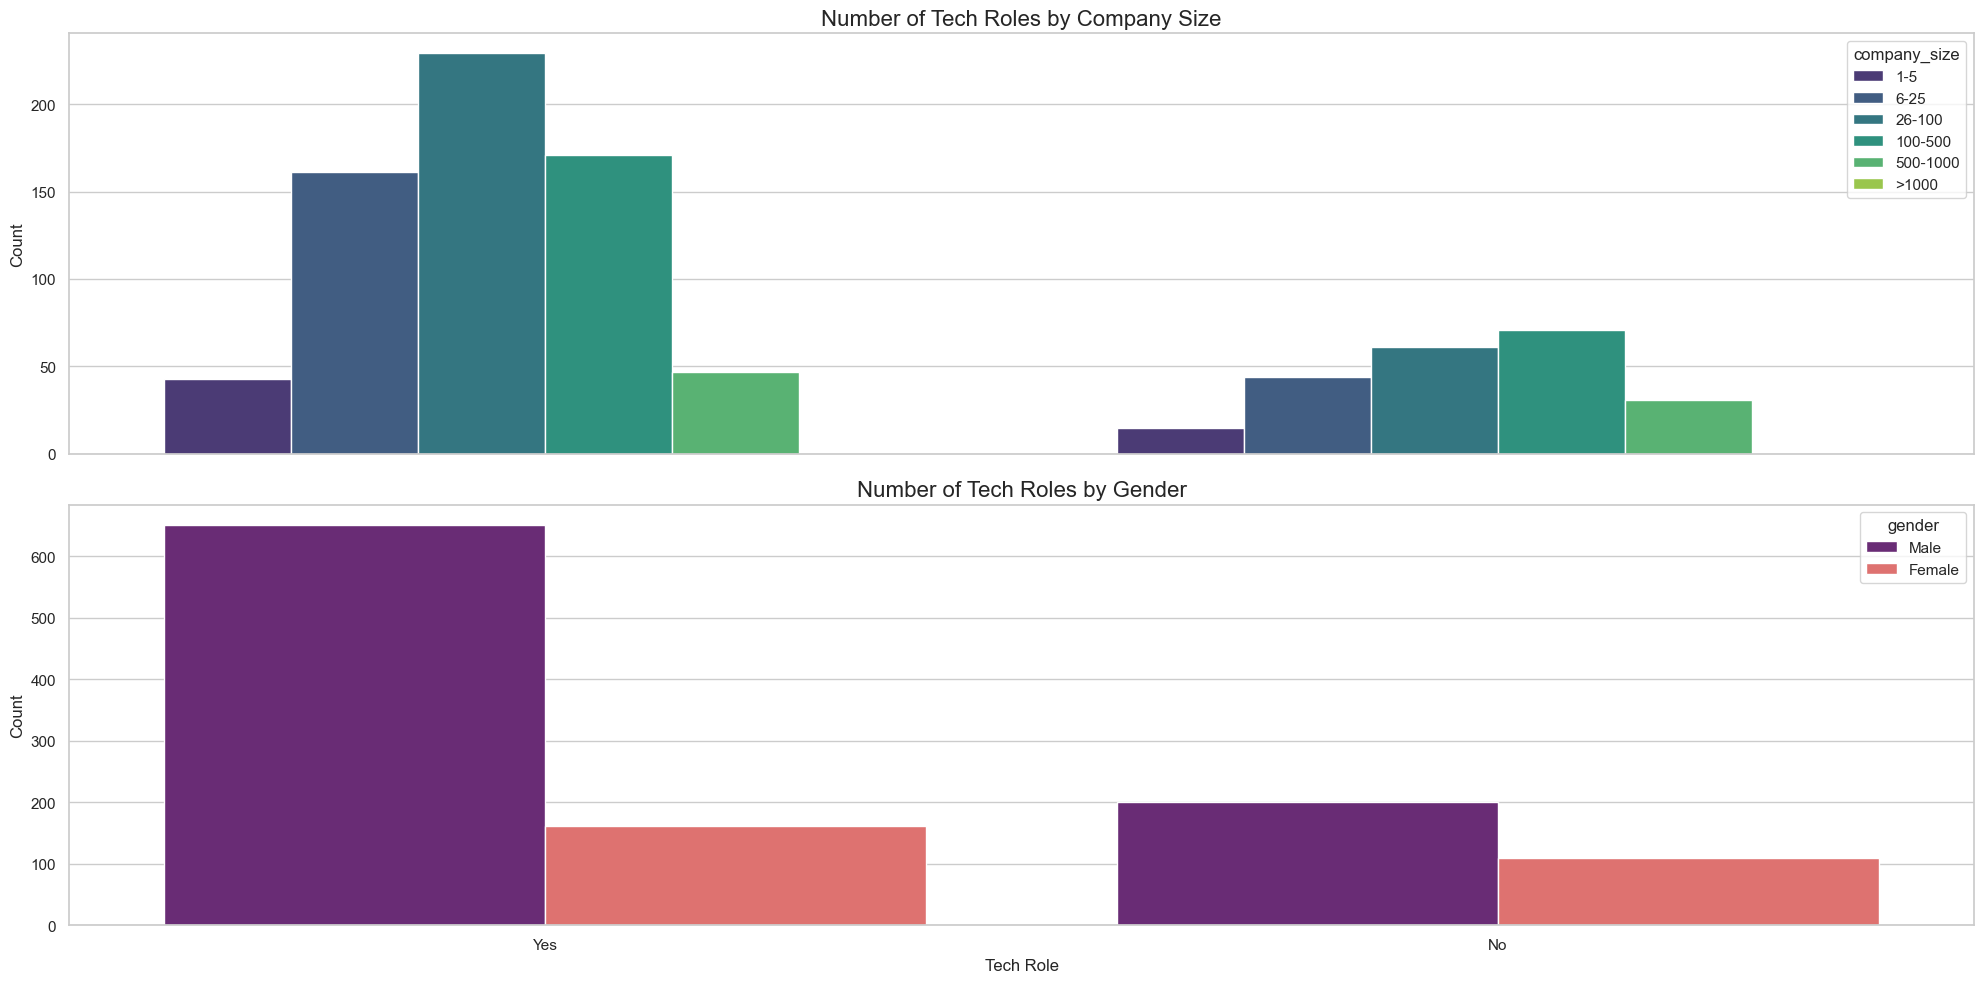

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)

# Define consistent order for company size
company_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", ">1000"]

# Plot 1: Tech roles by company size
sns.countplot(
    data=df,
    x="tech_role_flag",
    hue="company_size",
    hue_order=company_order,
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Number of Tech Roles by Company Size", fontsize=16)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Tech Role")

# Plot 2: Tech roles by gender
sns.countplot(
    data=df,
    x="tech_role_flag",
    hue="gender",
    palette="magma",
    ax=axes[1]
)
axes[1].set_title("Number of Tech Roles by Gender", fontsize=16)
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Tech Role")

# Adjust layout
plt.tight_layout()
plt.show()


Mental Disorder Today vs. the Past

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/4282992307.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 0], data=df, x="mh_disorder_current", palette=palette1)
/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/4282992307.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 1], data=df[df["mh_disorder_current"] == "Yes"], x="mh_disorder_past", palette=palette2)
/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/4282992307.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.coun

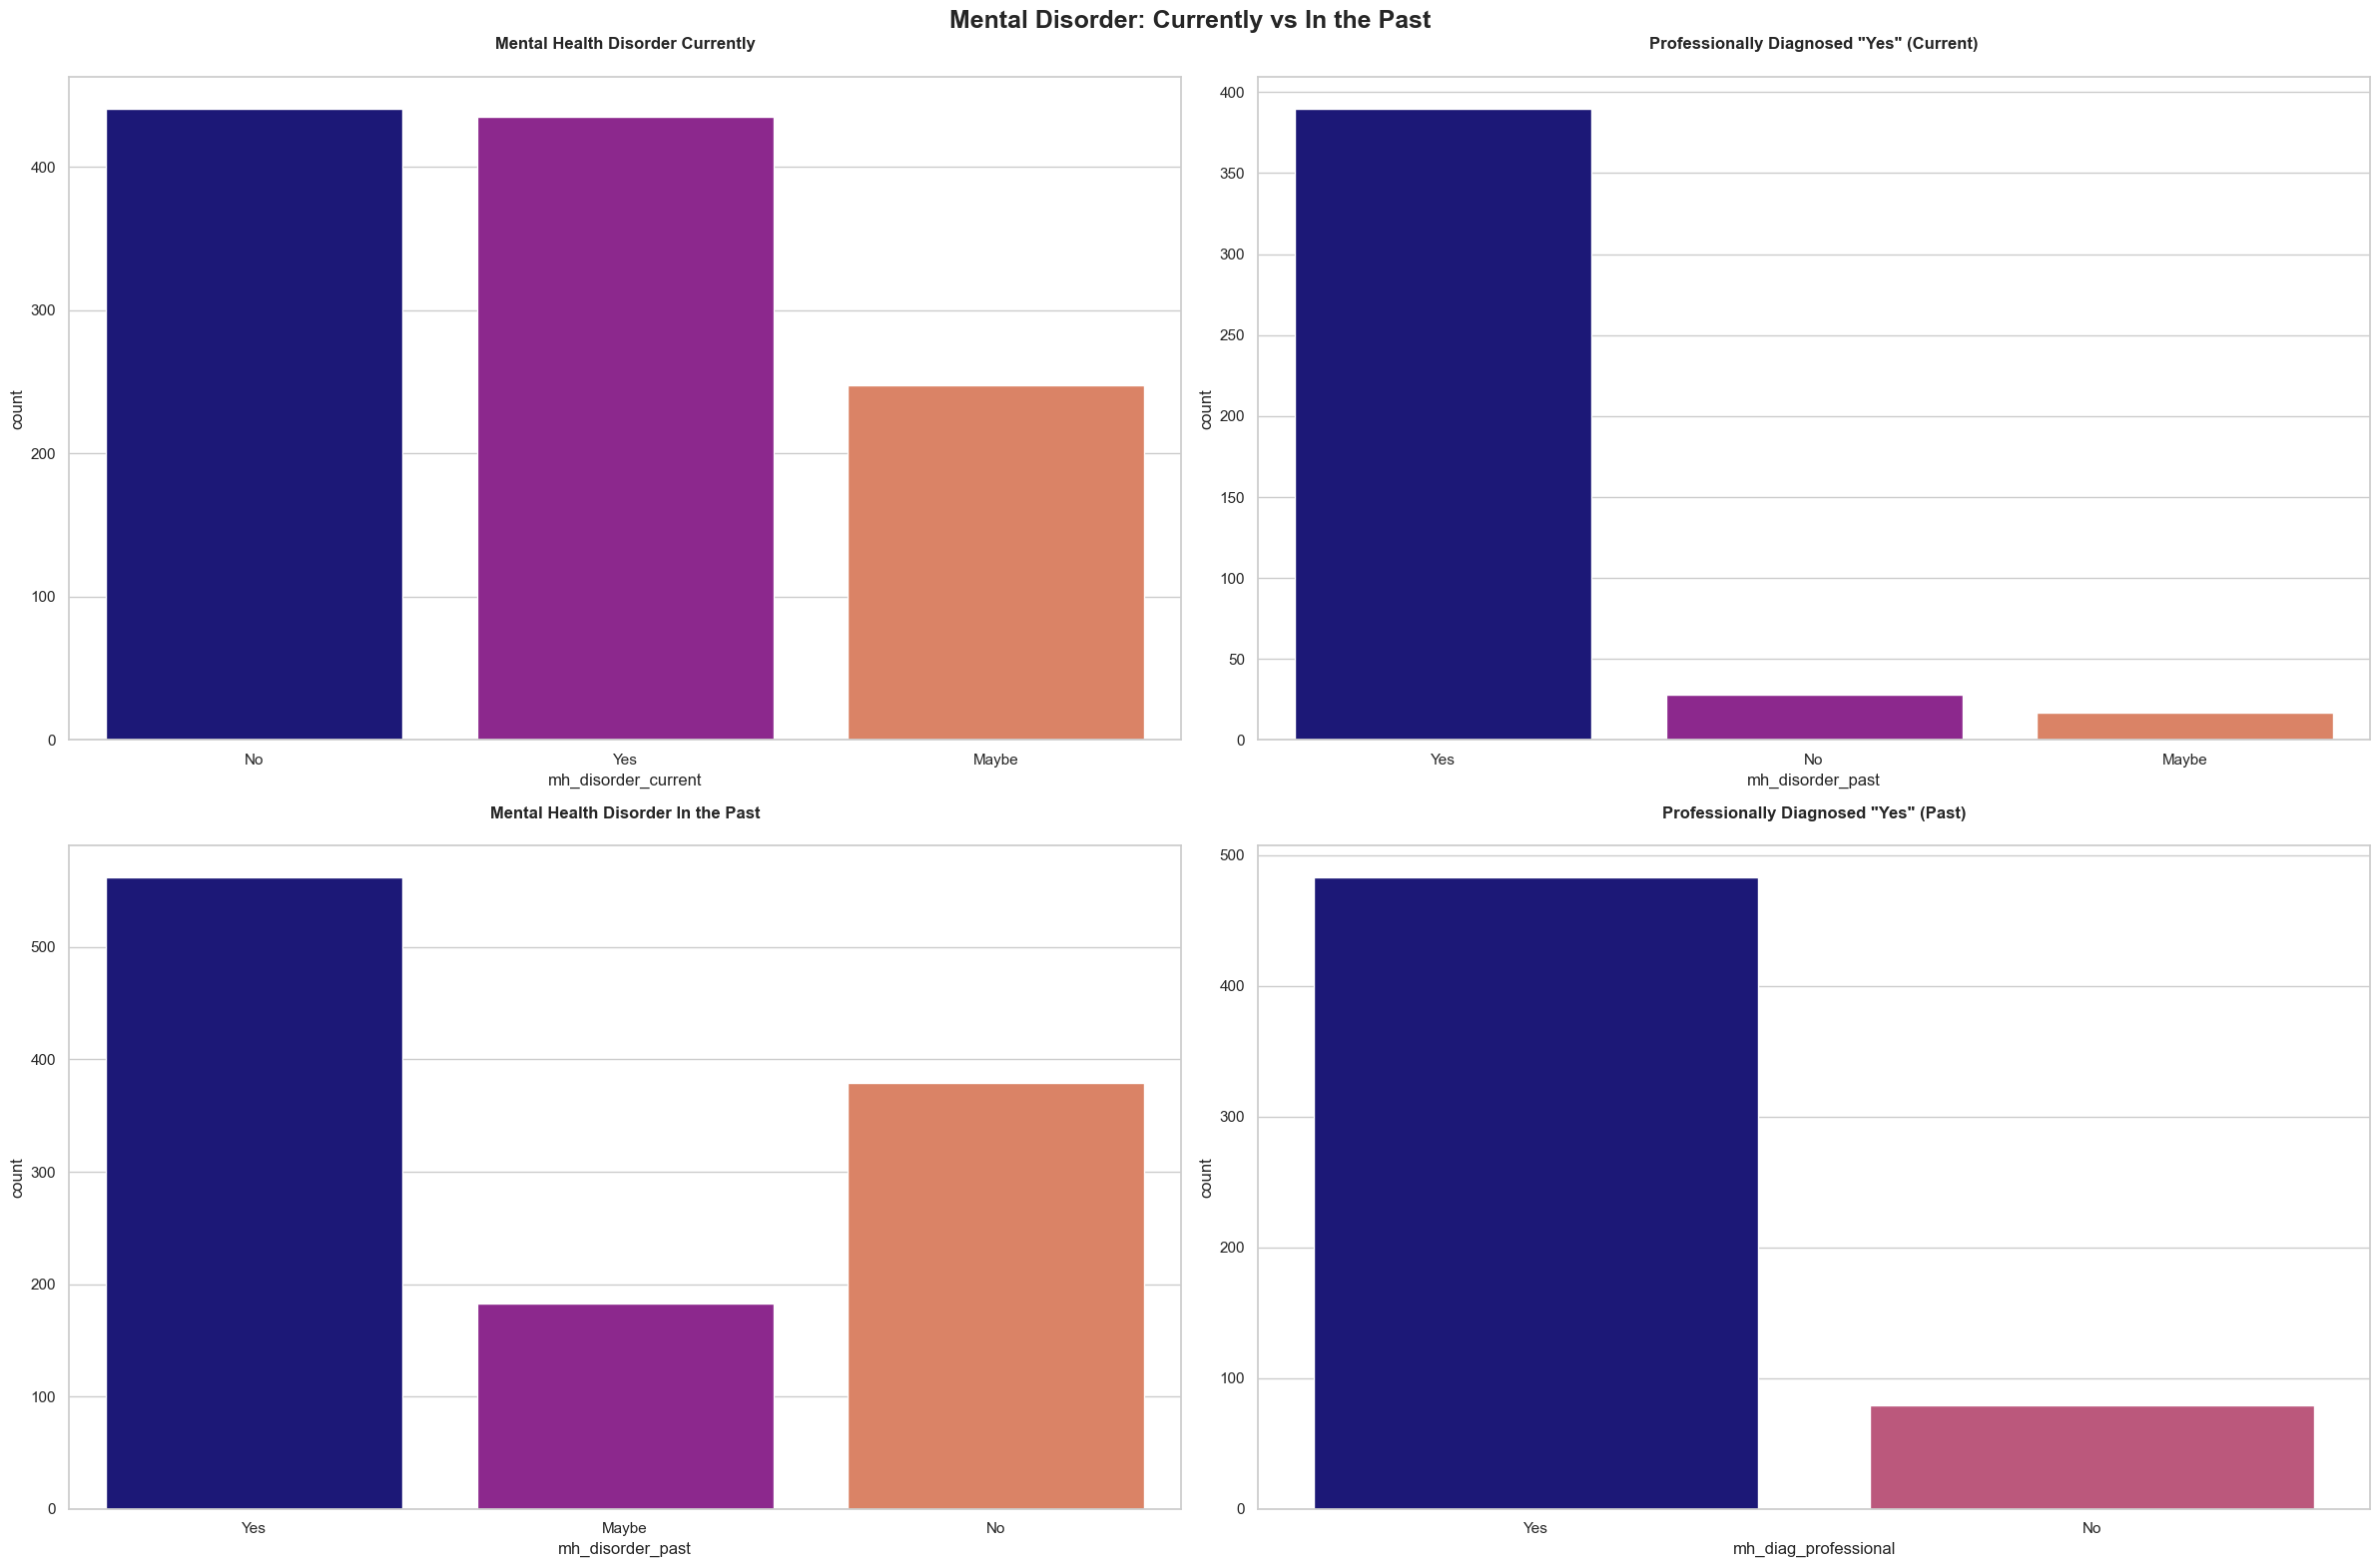

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import plasma
from matplotlib.colors import to_hex

# ✅ Correct function name and spelling
def get_plasma_palette(n):
    return [to_hex(plasma(i / n)) for i in range(n)]

# Set up the figure and axes for a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle('Mental Disorder: Currently vs In the Past', fontsize=18, fontweight="bold")

# Titles for the subplots
titles = [
    'Mental Health Disorder Currently',
    'Professionally Diagnosed "Yes" (Current)',
    'Mental Health Disorder In the Past',
    'Professionally Diagnosed "Yes" (Past)'
]

# Apply titles to each subplot
for i, title in enumerate(titles):
    row, col = divmod(i, 2)
    ax[row, col].set_title(title, pad=20, fontweight="bold")

# Set the general style
sns.set_style('whitegrid')

# Count unique values for palette sizing
unique_0_0 = df["mh_disorder_current"].nunique()
unique_0_1 = df[df["mh_disorder_current"] == "Yes"]["mh_disorder_past"].nunique()
unique_1_0 = df["mh_disorder_past"].nunique()
unique_1_1 = df[df["mh_disorder_past"] == "Yes"]["mh_diag_professional"].nunique()

# ✅ Use get_plasma_palette instead of get_magma_palette
palette1 = get_plasma_palette(unique_0_0)
palette2 = get_plasma_palette(unique_0_1)
palette3 = get_plasma_palette(unique_1_0)
palette4 = get_plasma_palette(unique_1_1)

# Create countplots using plasma-based palettes
sns.countplot(ax=ax[0, 0], data=df, x="mh_disorder_current", palette=palette1)
sns.countplot(ax=ax[0, 1], data=df[df["mh_disorder_current"] == "Yes"], x="mh_disorder_past", palette=palette2)
sns.countplot(ax=ax[1, 0], data=df, x="mh_disorder_past", palette=palette3)
sns.countplot(ax=ax[1, 1], data=df[df["mh_disorder_past"] == "Yes"], x="mh_diag_professional", palette=palette4)

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()


Change company size's last segment

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/3736202460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=keys,palette="viridis")


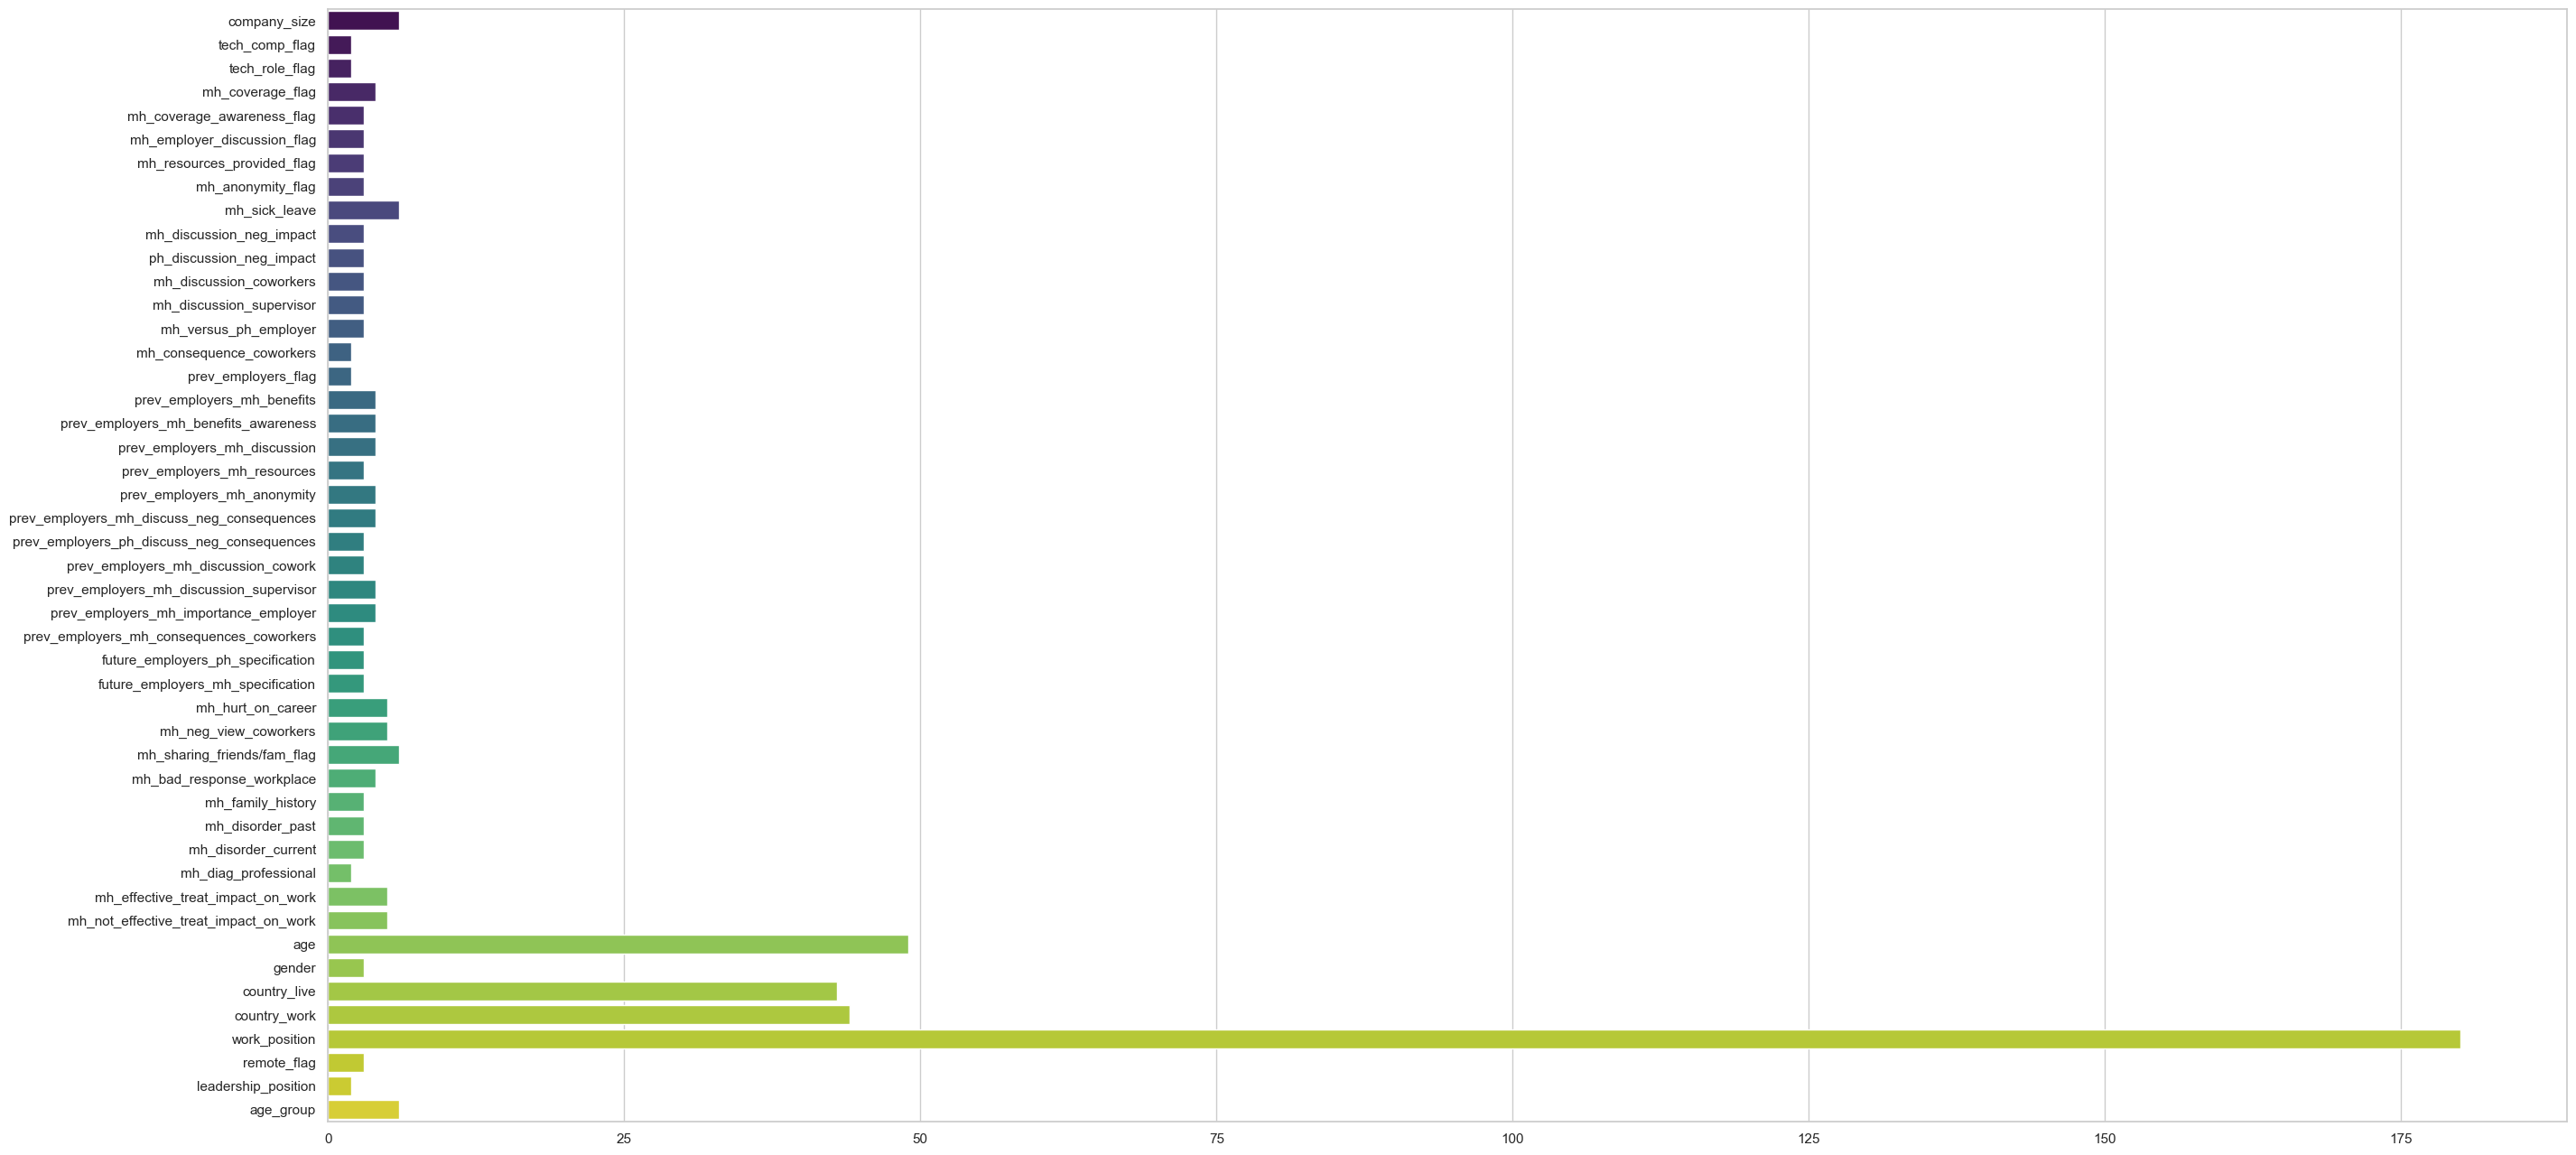

In [104]:
plt.figure(figsize=(32,16))
sns.color_palette("Set2")
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys,palette="viridis")
plt.show()

In [105]:
import numpy as np

# Define leadership keywords
leadership_keywords = r"Supervisor|Team Lead|Lead|Leadership|Executive"

# Create leadership_position column using np.where
df["leadership_position"] = np.where(
    df["work_position"].str.contains(leadership_keywords, case=False, na=False),
    "Yes",
    "No"
)

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/2959742860.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')
/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/2959742860.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')
/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5054/2959742860.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


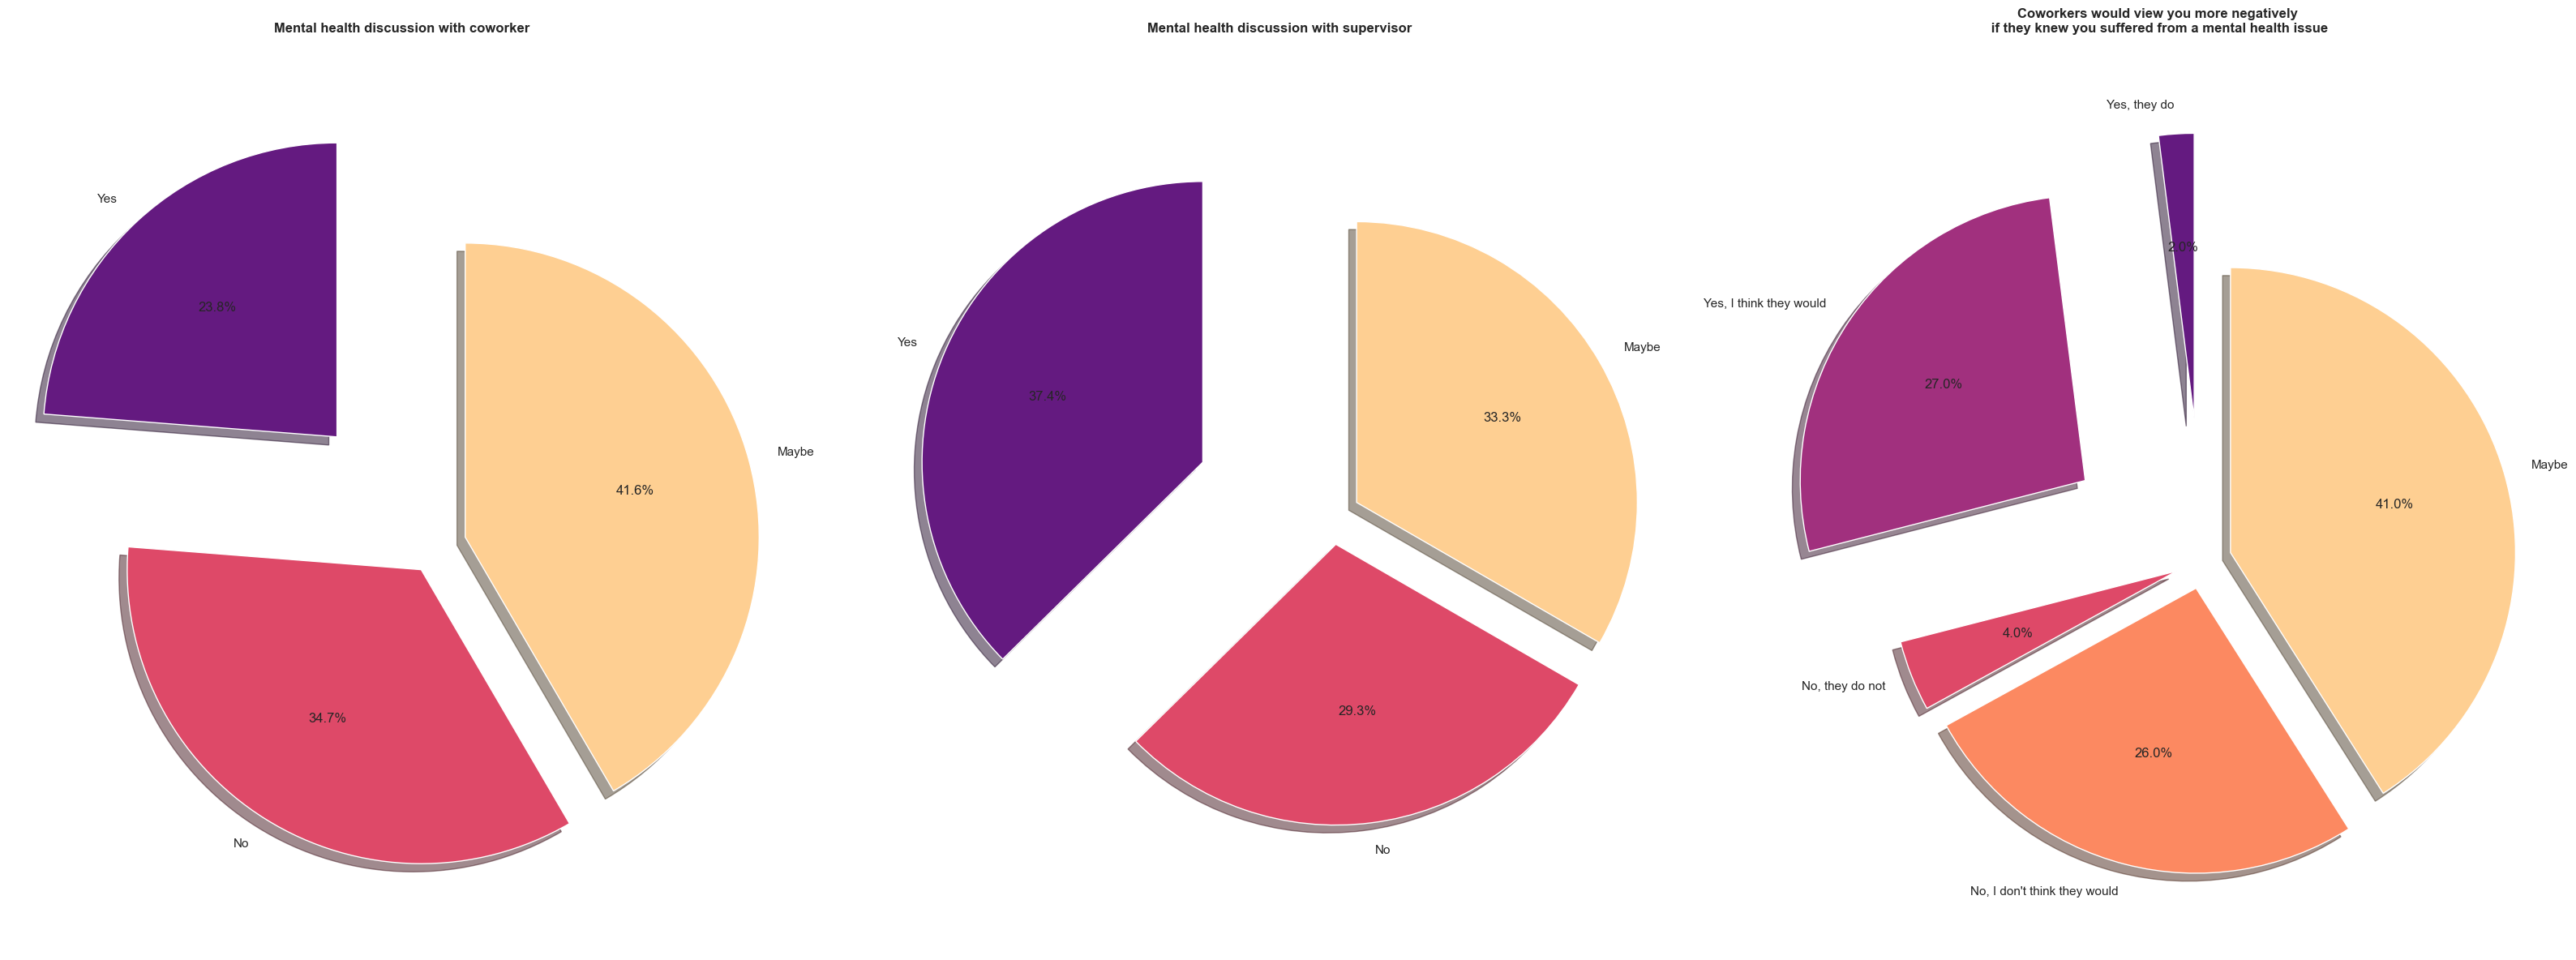

In [106]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Function to generate lighter magma colors (skipping the darkest range)
def get_magma_colors(n):
    cmap = cm.get_cmap('magma')
    return [cmap(i) for i in np.linspace(0.3, 0.9, n)]  # Lighter part of the colormap

# Set up the figure
fig, ax = plt.subplots(1, 3, figsize=(32, 12))
titles = [
    "Mental health discussion with coworker",
    "Mental health discussion with supervisor",
    "Coworkers would view you more negatively\n if they knew you suffered from a mental health issue"
]

for i, title in enumerate(titles):
    ax[i].set_title(title, pad=20, fontweight="bold")

# Pie chart 1
labels_1 = df.mh_discussion_coworkers.value_counts().sort_index(ascending=False).index.tolist()
sizes_1 = [round(a / len(df), 2) * 100 for a in df.mh_discussion_coworkers.value_counts().sort_index(ascending=False)]
colors_1 = get_magma_colors(len(labels_1))
explode_1 = (0.5, 0.1, 0.1)
ax[0].pie(sizes_1, explode=explode_1, labels=labels_1, colors=colors_1, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].axis('equal')

# Pie chart 2
labels_2 = df.mh_discussion_supervisor.value_counts().sort_index(ascending=False).index.tolist()
sizes_2 = [round(a / len(df), 2) * 100 for a in df.mh_discussion_supervisor.value_counts().sort_index(ascending=False)]
colors_2 = get_magma_colors(len(labels_2))
explode_2 = (0.5, 0.1, 0.1)
ax[1].pie(sizes_2, explode=explode_2, labels=labels_2, colors=colors_2, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].axis('equal')

# Pie chart 3
labels_3 = df.mh_neg_view_coworkers.value_counts().sort_index(ascending=False).index.tolist()
sizes_3 = [round(a / len(df), 2) * 100 for a in df.mh_neg_view_coworkers.value_counts().sort_index(ascending=False)]
colors_3 = get_magma_colors(len(labels_3))
explode_3 = (0.5, 0.5, 0.1, 0.1, 0.1)
ax[2].pie(sizes_3, explode=explode_3, labels=labels_3, colors=colors_3, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2].axis('equal')

# Final layout
fig.tight_layout()
plt.show()


Negative impact of discussing Mental Health vs Physical Health

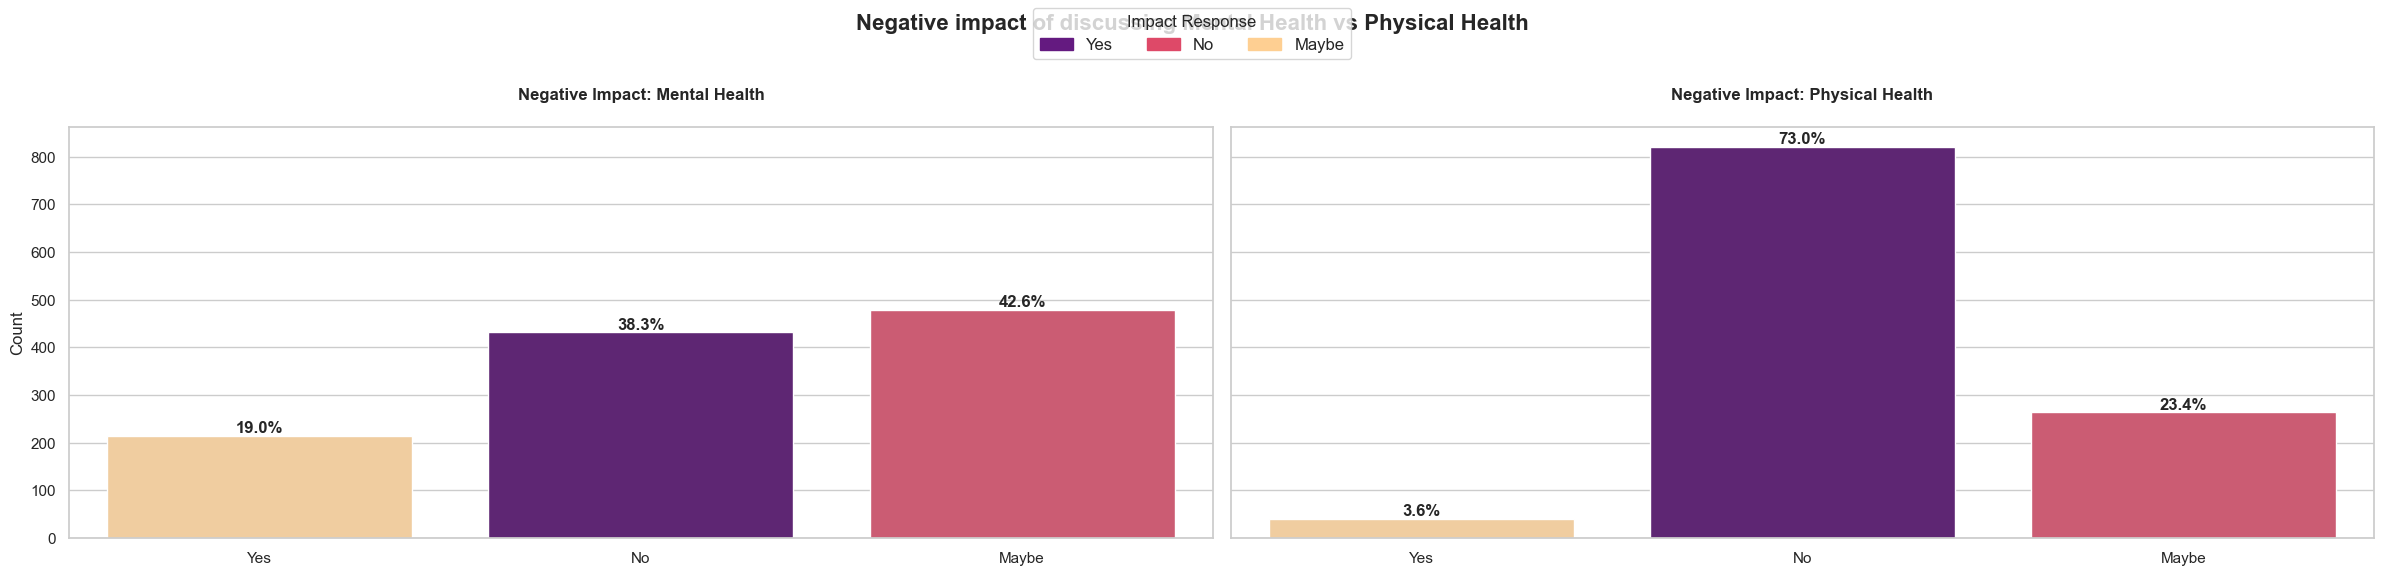

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Custom magma color function (lighter range)
def get_magma_colors(n):
    cmap = plt.get_cmap('magma')  # Updated to use plt.get_cmap()
    return [cmap(i) for i in np.linspace(0.3, 0.9, n)]

# Set global style
sns.set_style("whitegrid")

# Define shared figure
fig, ax = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
fig.suptitle('Negative impact of discussing Mental Health vs Physical Health', fontsize=16, fontweight='bold')

# Define the questions and axes
questions = ['mh_discussion_neg_impact', 'ph_discussion_neg_impact']
titles = ['Negative Impact: Mental Health', 'Negative Impact: Physical Health']
orders = ["Yes", "No", "Maybe"]
colors = get_magma_colors(len(orders))

# Loop through each subplot
for i, (question, title) in enumerate(zip(questions, titles)):
    sns.countplot(ax=ax[i], data=df, x=question, hue=question, order=orders, palette=colors, legend=False)  # Assign x to hue
    ax[i].set_title(title, pad=20, fontweight="bold")
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')

    # Annotate bars with percentages
    total = len(df)
    for p in ax[i].patches:
        height = p.get_height()
        percent = f'{(height / total) * 100:.1f}%'
        ax[i].annotate(percent,
                       (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=12, fontweight='semibold')

# Create custom legend
handles = [
    mpatches.Patch(color=colors[0], label="Yes"),
    mpatches.Patch(color=colors[1], label="No"),
    mpatches.Patch(color=colors[2], label="Maybe")
]

# Add the custom legend to the figure
fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=12, title='Impact Response')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


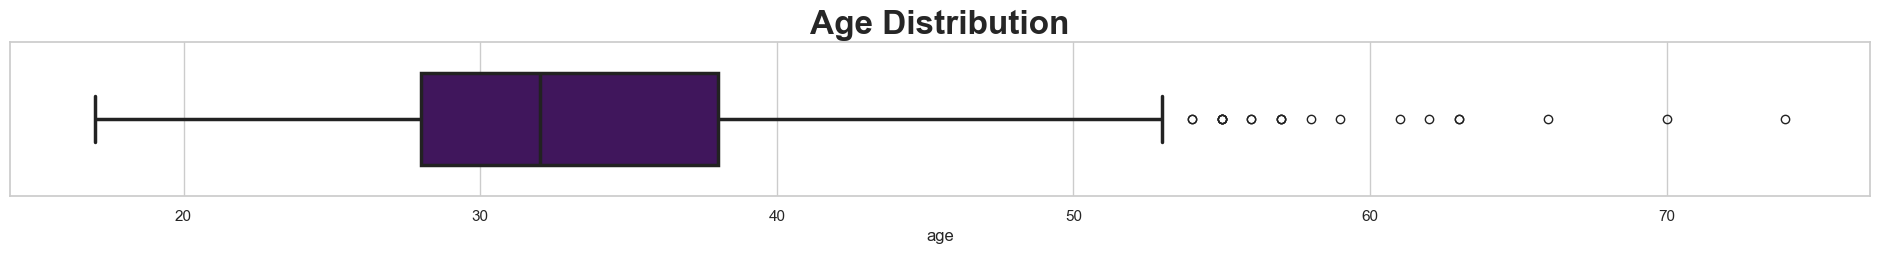

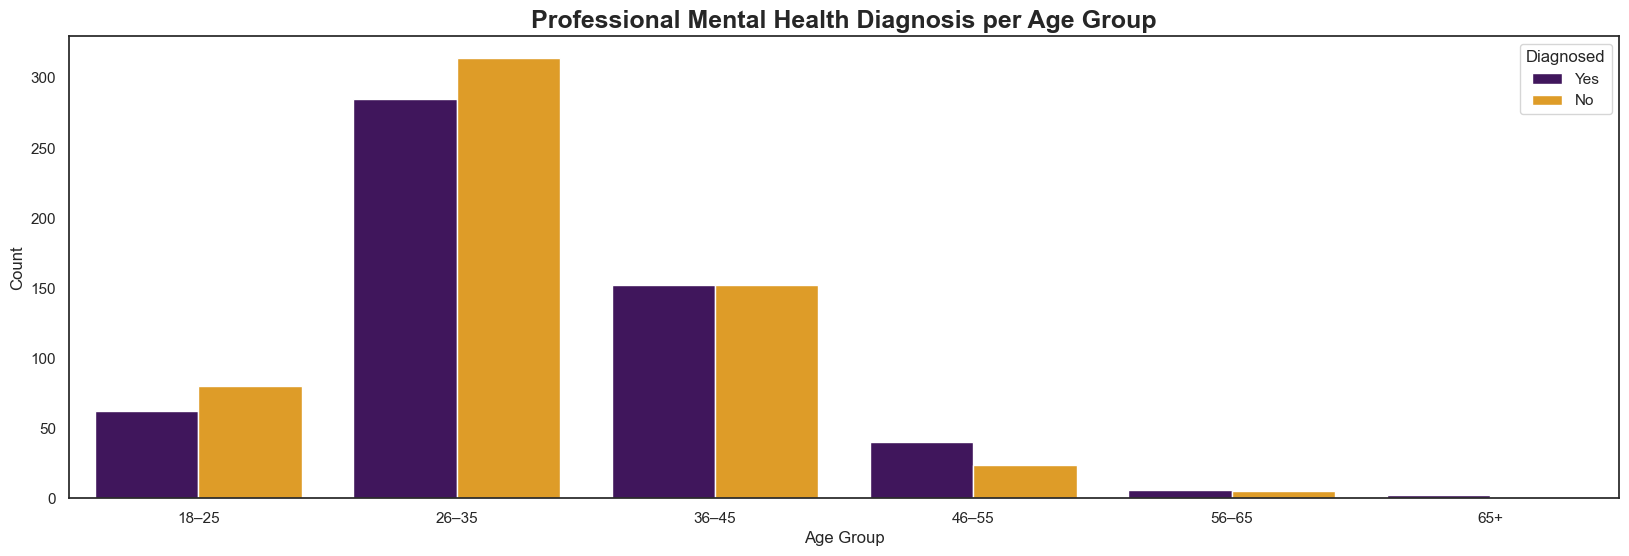

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Custom color palette generator focusing on rose and orange
def get_rose_orange_colors(n):
    cmap = plt.colormaps.get_cmap('inferno')  # 'inferno' has strong orange and rose tones
    # Sampling more varied points to cover rose to amber to orange
    indices = np.linspace(0.2, 0.8, n)
    return [cmap(i) for i in indices]

# Age grouping for countplot
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65, 100],
                         labels=['18–25','26–35','36–45','46–55','56–65','65+'])

# === 1. Boxplot: Age Distribution ===
plt.figure(figsize=(24, 2))
sns.set_style("whitegrid")
ax = sns.boxplot(x="age", data=df, color=get_rose_orange_colors(1)[0], linewidth=2.5, width=0.6)
ax.set_title("Age Distribution", fontsize=24, fontweight="bold")
plt.show()

# === 2. Countplot: Diagnosed per Age Group ===
plt.figure(figsize=(20, 6))
sns.set_style("white")
ax = sns.countplot(data=df, x="age_group", hue="mh_diag_professional",
                   palette=get_rose_orange_colors(2),
                   )

ax.set_title("Professional Mental Health Diagnosis per Age Group", fontsize=18, fontweight="bold")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
ax.legend(title="Diagnosed", loc="upper right")
plt.grid(False)
plt.show()

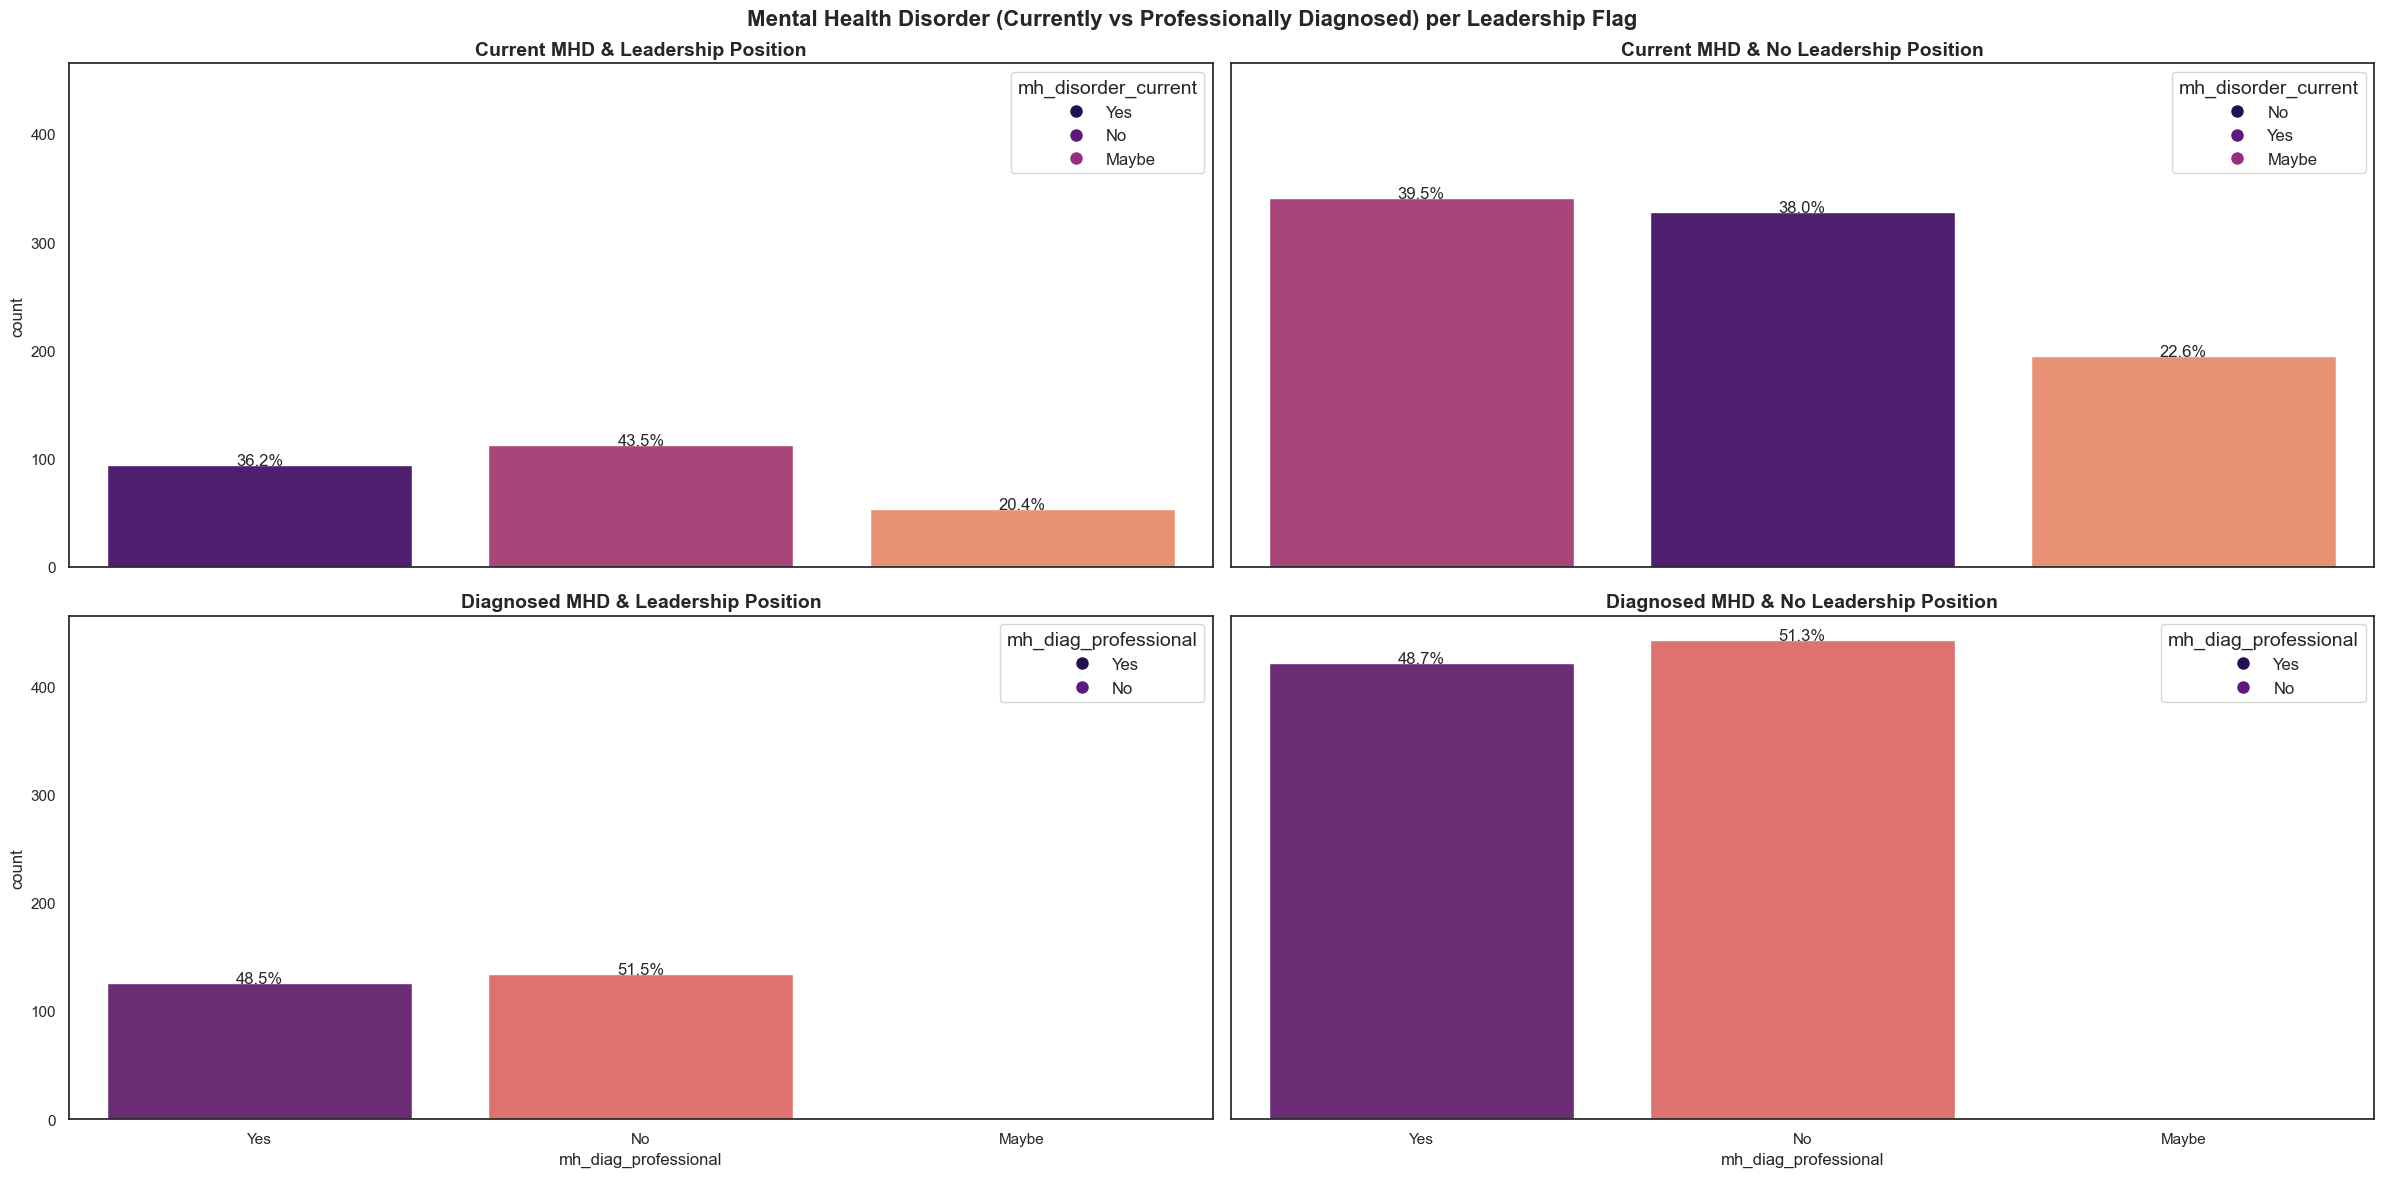

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the countplot with percentage annotations and custom legend
def plot_countplot(ax, data, x, hue, title, total_count, palette="magma"):
    sns.countplot(ax=ax, data=data, x=x, hue=hue, palette=palette, legend=False)
    ax.set_title(title, fontsize=14, fontweight="bold")

    # Annotate each bar with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        ax.annotate(percentage, (x_pos, y_pos), ha='center', va='baseline')

    # Create a custom legend
    hue_values = data[hue].unique()
    handles = []
    for value in hue_values:
        color = sns.color_palette(palette)[hue_values.tolist().index(value)]  # Get color for the value
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    ax.legend(handles, hue_values, title=hue, loc='upper right', fontsize=12, title_fontsize=14)

# Set up a 2x2 grid for subplots
fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey=True, sharex=True)
fig.suptitle('Mental Health Disorder (Currently vs Professionally Diagnosed) per Leadership Flag', fontsize=16, fontweight='bold')

# Calculate total counts for leadership positions
total_leadership_position = len(df[df.leadership_position == "Yes"])
total_no_leadership_position = len(df[df.leadership_position == "No"])

# Plot for "Current MHD & Leadership Position"
plot_countplot(ax[0, 0], df[df["leadership_position"] == "Yes"], "mh_disorder_current", "mh_disorder_current",
               "Current MHD & Leadership Position", total_leadership_position)

# Plot for "Current MHD & No Leadership Position"
plot_countplot(ax[0, 1], df[df["leadership_position"] == "No"], "mh_disorder_current", "mh_disorder_current",
               "Current MHD & No Leadership Position", total_no_leadership_position)

# Plot for "Diagnosed MHD & Leadership Position"
plot_countplot(ax[1, 0], df[df["leadership_position"] == "Yes"], "mh_diag_professional", "mh_diag_professional",
               "Diagnosed MHD & Leadership Position", total_leadership_position)

# Plot for "Diagnosed MHD & No Leadership Position"
plot_countplot(ax[1, 1], df[df["leadership_position"] == "No"], "mh_diag_professional", "mh_diag_professional",
               "Diagnosed MHD & No Leadership Position", total_no_leadership_position)

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()
